## Setup and Load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json
import sklearn
import math

In [3]:
#loading the data sets
# Import the parsing function from the separate file
from parse_pgn_games import create_games_csv

# Parse the PGN file and create CSV
pgn_path = 'Data/lichess_AuraChessTransformer_2026-01-22.pgn'
output_csv_path = 'Data/games_summary.csv'

games_df = create_games_csv(pgn_path, output_csv_path)
print(f"\n✓ Saved game summary to: {output_csv_path}")


# Display summary
print(f"Total games parsed: {len(games_df)}")


print("Games DATASET OVERVIEW:")
print(f"\nShape: {games_df.shape[0]:,} rows × {games_df.shape[1]} columns")

# Display column types and non-null counts
print(games_df.info())

# TODO: Load CSV from Data/results_full.csv
# - Use pandas read_csv()
# - Store in variable: df
print("FIRST 5 ROWS:")
display(games_df.head())  # Use display() for better Jupyter rendering


✓ Saved game summary to: Data/games_summary.csv
Total games parsed: 453
Games DATASET OVERVIEW:

Shape: 453 rows × 18 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            453 non-null    object
 1   date               453 non-null    object
 2   utc_date           453 non-null    object
 3   utc_time           453 non-null    object
 4   white_player       453 non-null    object
 5   black_player       453 non-null    object
 6   white_elo          453 non-null    object
 7   black_elo          453 non-null    object
 8   white_rating_diff  453 non-null    object
 9   black_rating_diff  453 non-null    object
 10  result             453 non-null    object
 11  winner             453 non-null    object
 12  num_moves          453 non-null    int64 
 13  time_control       453 non-null    object
 14  eco        

,game_id,date,utc_date,utc_time,white_player,black_player,white_elo,black_elo,white_rating_diff,black_rating_diff,result,winner,num_moves,time_control,eco,termination,variant,site
0,euTIepDn,2025.11.11,2025.11.11,15:16:08,AuraChessTransformer,AuraChessCNN,1584,1519,-1,+1,1/2-1/2,Draw,50,180+2,A46,Normal,Standard,https://lichess.org/euTIepDn
1,qLtehhxd,2025.11.11,2025.11.11,15:15:46,AuraChessCNN,AuraChessTransformer,1512,1591,+7,-7,1-0,AuraChessCNN,30,180+2,B06,Normal,Standard,https://lichess.org/qLtehhxd
2,yUmq5927,2025.11.11,2025.11.11,15:15:04,AuraChessTransformer,AuraChessCNN,1593,1511,-2,+1,1/2-1/2,Draw,61,180+2,D27,Normal,Standard,https://lichess.org/yUmq5927
3,0FEHbp3I,2025.11.11,2025.11.11,15:14:30,AuraChessTransformer,AuraChessCNN,1588,1515,+5,-4,1-0,AuraChessTransformer,51,180+2,E94,Normal,Standard,https://lichess.org/0FEHbp3I
4,8dccm5I4,2025.11.11,2025.11.11,15:13:55,AuraChessCNN,AuraChessTransformer,1520,1583,-5,+5,0-1,AuraChessTransformer,48,180+2,B88,Normal,Standard,https://lichess.org/8dccm5I4


In [4]:
# loading new data

raw_df = pd.read_csv('Data/results_first_move.csv')

# display first 5 rows
print(raw_df.head())

# display info
print(raw_df.info())


  PuzzleId                                                FEN  \
0    00008  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1    0000D  5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...   
2    0008Q       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
3    0009B  r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...   
4    000Pw  6k1/5p1p/4p3/4q3/3nN3/2Q3P1/PP3P1P/6K1 w - - 2 37   

                           Moves  Rating  RatingDeviation  Popularity  \
0  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1    1877               76          95   
1            d3d6 f8d8 d6d8 f6d8    1501               73          96   
2            e7f7 f5e5 e2f1 e5e6    1355               76          91   
3            b6c5 e2g4 h3g4 d1g4    1103               74          88   
4            e4d2 d4e2 g1f1 e2c3    1422               74          92   

   NbPlays                                 Themes  \
0     8786  crushing hangingPiece long middlegame   
1    35000                advantage endgame short   
2      743 

In [5]:
puzzles_df = raw_df.copy()

# add the number of moves to the puzzles dataset a move in chess is a full move (white + black)
puzzles_df['num_moves'] = puzzles_df['Moves'].apply(lambda x: math.ceil(len(str(x).split()) / 2) if pd.notna(x) and str(x).strip() else 0)

display(puzzles_df.head())

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,cnn_first_move_correct,transformer_first_move_correct,cnn_first_move_top5_correct,transformer_first_move_top5_correct,cnn_first_move,transformer_first_move,cnn_top5_moves,transformer_top5_moves,num_moves
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1877,76,95,8786,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,1,1,1,1,e6e7,e6e7,"[""e6e7"", ""e6f6"", ""h2g3"", ""h6f6"", ""h2h3""]","[""e6e7"", ""e6f6"", ""h2g3"", ""h2h3"", ""e6e3""]",3
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1501,73,96,35000,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,0,0,0,0,b6d6,b6a5,"[""b6d6"", ""b6a5"", ""b6b5"", ""b6a7"", ""b6c6""]","[""b6a5"", ""b6d6"", ""b6b5"", ""b6d8"", ""b6a7""]",2
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1355,76,91,743,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,1,1,1,1,f5e5,f5e5,"[""f5e5"", ""f5f7"", ""f5h5"", ""f5d5"", ""f5f3""]","[""f5e5"", ""f5f7"", ""f5h5"", ""f5g5"", ""f5f3""]",2
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1103,74,88,603,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,1,1,1,1,e2g4,e2g4,"[""e2g4"", ""e2f1"", ""e2f3"", ""b1c3"", ""d2c4""]","[""e2g4"", ""e2f1"", ""e2f3"", ""d2c4"", ""d2f1""]",2
4,000Pw,6k1/5p1p/4p3/4q3/3nN3/2Q3P1/PP3P1P/6K1 w - - 2 37,e4d2 d4e2 g1f1 e2c3,1422,74,92,604,crushing endgame fork short,https://lichess.org/au2lCK5o#73,NaN,0,0,1,1,e5e1,e5e1,"[""e5e1"", ""e5e2"", ""e5d5"", ""d4e2"", ""e5f5""]","[""e5e1"", ""e5e2"", ""d4e2"", ""e5d5"", ""e5h5""]",2


## Research Question:

## The Amplification Paradox: Why does a marginal 5% lead in puzzle accuracy translate into a disproportionate ~18% domination in gameplay? ##

## Demonstrating Head-To-Head Metric

WIN RATE ANALYSIS

Total games: 453

AuraChessTransformer wins: 215 (47.46%)
AuraChessCNN wins: 146 (32.23%)
Draws: 92 (20.31%)


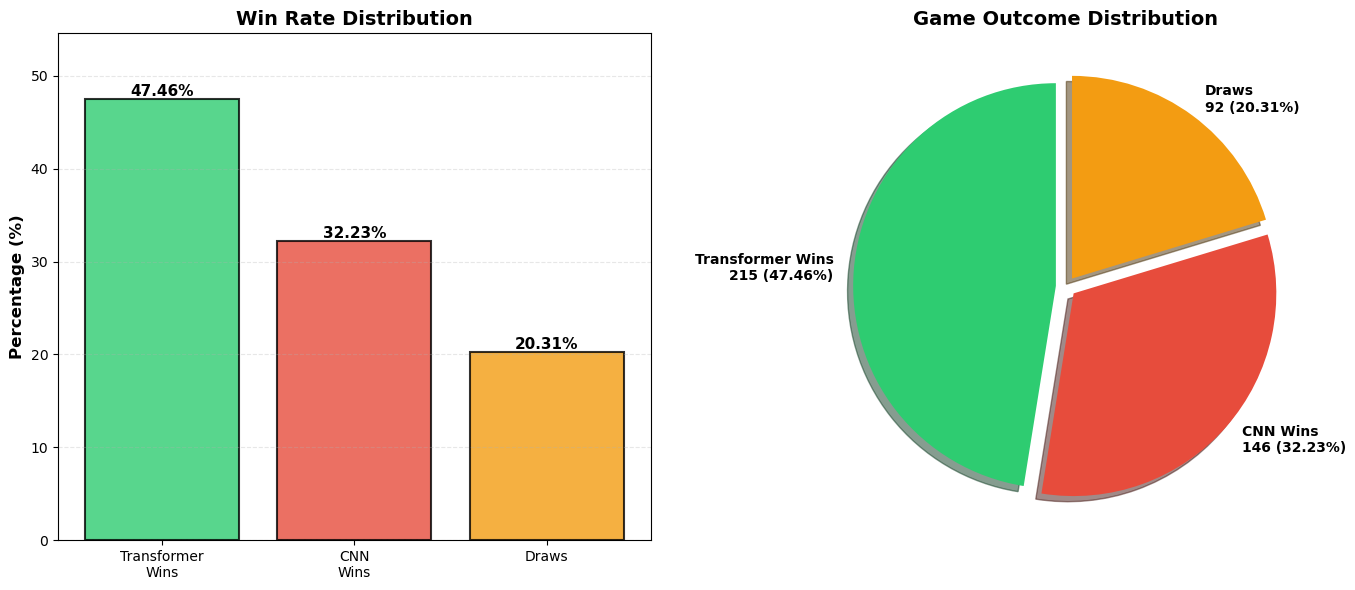


Win rates (excluding draws):
  AuraChessTransformer: 215/361 (59.56%)
  AuraChessCNN: 146/361 (40.44%)

Win rates (including draws):
  AuraChessTransformer: 215/453 (47.46%)
  AuraChessCNN: 146/453 (32.23%)
  Draws: 92/453 (20.31%)


In [6]:
# Section 2: Reproduce the Paradox

# Plot the win rate of the transformer and the CNN and the draw rate

# Calculate win percentages
total_games = len(games_df)
transformer_wins = len(games_df[games_df['winner'] == 'AuraChessTransformer'])
cnn_wins = len(games_df[games_df['winner'] == 'AuraChessCNN'])
draws = len(games_df[games_df['winner'] == 'Draw'])

# Calculate percentages
transformer_win_pct = 100 * transformer_wins / total_games
cnn_win_pct = 100 * cnn_wins / total_games
draw_pct = 100 * draws / total_games

# Print the percentages
print("=" * 60)
print("WIN RATE ANALYSIS")
print("=" * 60)
print(f"\nTotal games: {total_games}")
print(f"\nAuraChessTransformer wins: {transformer_wins} ({transformer_win_pct:.2f}%)")
print(f"AuraChessCNN wins: {cnn_wins} ({cnn_win_pct:.2f}%)")
print(f"Draws: {draws} ({draw_pct:.2f}%)")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
categories = ['Transformer\nWins', 'CNN\nWins', 'Draws']
percentages = [transformer_win_pct, cnn_win_pct, draw_pct]
colors = ['#2ecc71', '#e74c3c', '#f39c12']

bars = ax1.bar(categories, percentages, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Win Rate Distribution', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(percentages) * 1.15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct:.2f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
sizes = [transformer_wins, cnn_wins, draws]
labels = [f'Transformer Wins\n{transformer_wins} ({transformer_win_pct:.2f}%)',
          f'CNN Wins\n{cnn_wins} ({cnn_win_pct:.2f}%)',
          f'Draws\n{draws} ({draw_pct:.2f}%)']
explode = (0.05, 0.05, 0.05)  # Slight separation

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='',
        shadow=True, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Game Outcome Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Win rates excluding draws
if transformer_wins + cnn_wins > 0:
    print(f"\nWin rates (excluding draws):")
    print(f"  AuraChessTransformer: {transformer_wins}/{transformer_wins + cnn_wins} ({100*transformer_wins/(transformer_wins + cnn_wins):.2f}%)")
    print(f"  AuraChessCNN: {cnn_wins}/{transformer_wins + cnn_wins} ({100*cnn_wins/(transformer_wins + cnn_wins):.2f}%)")

# Win rates including draws
print(f"\nWin rates (including draws):")
print(f"  AuraChessTransformer: {transformer_wins}/{total_games} ({transformer_win_pct:.2f}%)")
print(f"  AuraChessCNN: {cnn_wins}/{total_games} ({cnn_win_pct:.2f}%)")
print(f"  Draws: {draws}/{total_games} ({draw_pct:.2f}%)")



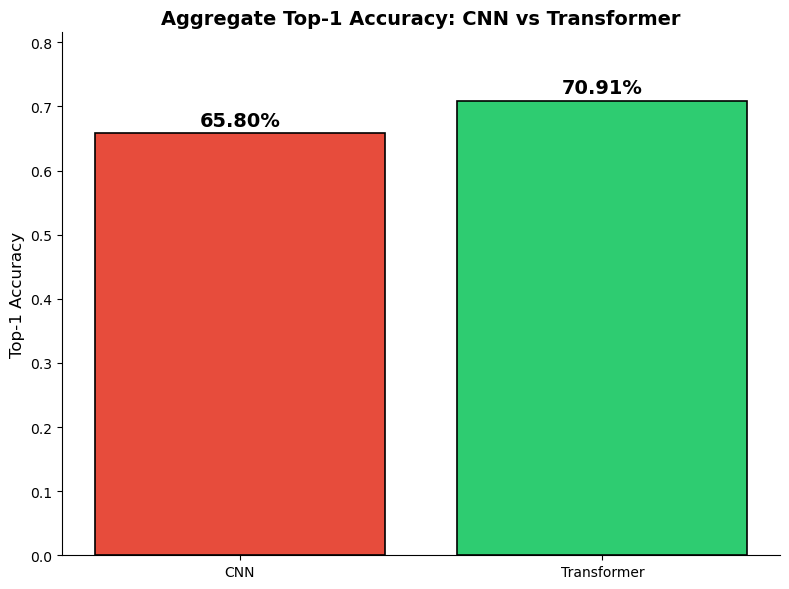

CNN Top-1 Accuracy: 0.6580
Transformer Top-1 Accuracy: 0.7091

Paradox: CNN >= Transformer in aggregate (or ties)


In [7]:

#ask about the preprocessing for the data (lke extracting the ground truth move)

# Compute Top-1 accuracy for CNN and Transformer
cnn_top1_acc = puzzles_df['cnn_first_move_correct'].mean()
tr_top1_acc = puzzles_df['transformer_first_move_correct'].mean()


# Create comparison bar plot showing aggregate accuracies
fig, ax = plt.subplots(figsize=(8, 6))

models = ['CNN', 'Transformer']
accuracies = [cnn_top1_acc, tr_top1_acc]
colors = ['#e74c3c','#2ecc71']

bars = ax.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{acc:.2%}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
ax.set_ylabel('Top-1 Accuracy', fontsize=12)
ax.set_title('Aggregate Top-1 Accuracy: CNN vs Transformer', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(accuracies) * 1.15)  # Add space for labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#Display the paradox
print(f"CNN Top-1 Accuracy: {cnn_top1_acc:.4f}")
print(f"Transformer Top-1 Accuracy: {tr_top1_acc:.4f}")
print("\nParadox: CNN >= Transformer in aggregate (or ties)")


## Data Cleaning and Filling

In [8]:
#check for missing values

#check in games dataset
missing=False
for col in games_df.columns:
    missing_values = games_df[col].isnull().sum()
    if missing_values > 0:
        print(f"Column '{col}' has {missing_values} missing values.")
        missing=True

if missing:
    print("Missing values found in the games dataset.")
else:
    print("No missing values found in the games dataset.")


#check in puzzles dataset
missing=False
for col in puzzles_df.columns:
    missing_values = puzzles_df[col].isnull().sum()
    if missing_values > 0:
        print(f"Column '{col}' has {missing_values} missing values.")
        missing=True

if missing:
    print("Missing values found in the puzzles dataset.")
else:
    print("No missing values found in the puzzles dataset.")




#Handle missing values in critical columns, after inspecting the data we relised taht missing values 
# in this column indicate a later step in the game, making it its own category
puzzles_df['OpeningTags'] = puzzles_df['OpeningTags'].fillna('unknown_opening')




# Check for duplicate game id
dup_mask = games_df['game_id'].duplicated(keep=False) 
n_dup_rows = dup_mask.sum()
n_dup_ids = games_df.loc[dup_mask, 'game_id'].nunique()


if n_dup_ids == 0:
    print("No duplicate Game ID found.")
else:
    print(f"Rows with duplicated Game ID: {n_dup_rows:,}")
    print(f"Unique Game ID values that are duplicated: {n_dup_ids:,}")

# Check for duplicate PuzzleId values
dup_mask = puzzles_df['PuzzleId'].duplicated(keep=False) 
n_dup_rows = dup_mask.sum()
n_dup_ids = puzzles_df.loc[dup_mask, 'PuzzleId'].nunique()


if n_dup_ids == 0:
    print("No duplicate PuzzleId values found.")
else:
    print(f"Rows with duplicated PuzzleId: {n_dup_rows:,}")
    print(f"Unique PuzzleId values that are duplicated: {n_dup_ids:,}")


No missing values found in the games dataset.
Column 'OpeningTags' has 4471771 missing values.
Missing values found in the puzzles dataset.
No duplicate Game ID found.
No duplicate PuzzleId values found.


## Boxplots and Outlier Handling


Summary statistics for numeric columns:


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Rating,5600086.0,1483.663988,546.514349,399.0,462.0,663.0,1054.0,1435.0,1890.0,2438.0,2727.0,3395.0
RatingDeviation,5600086.0,87.110992,27.581030,45.0,74.0,74.0,76.0,78.0,88.0,119.0,209.0,500.0
Popularity,5600086.0,86.152684,14.267439,-83.0,25.0,58.0,83.0,90.0,94.0,100.0,100.0,100.0
NbPlays,5600086.0,1650.867153,4485.639812,0.0,8.0,24.0,107.0,350.0,1221.0,8222.0,21030.0,312554.0
num_moves,5600086.0,2.322185,0.925840,1.0,1.0,1.0,2.0,2.0,3.0,4.0,5.0,17.0


count    453.000000
mean      44.951435
std       13.953219
min       12.000000
1%        20.000000
5%        25.000000
25%       34.000000
50%       45.000000
75%       54.000000
95%       70.000000
99%       78.480000
max       87.000000
Name: num_moves, dtype: float64

--- Visualizing Puzzles Dataset ---


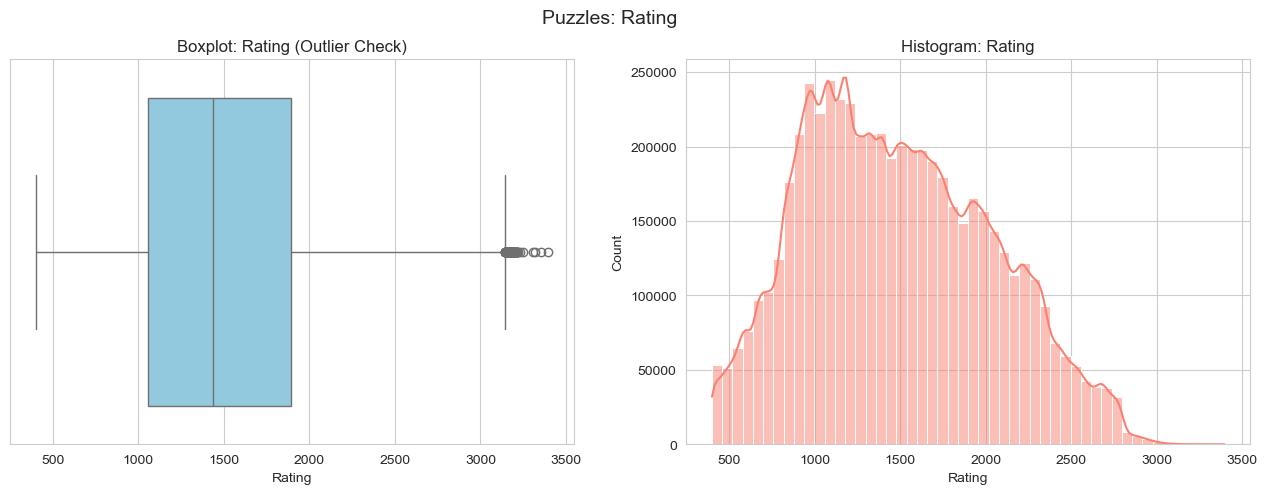

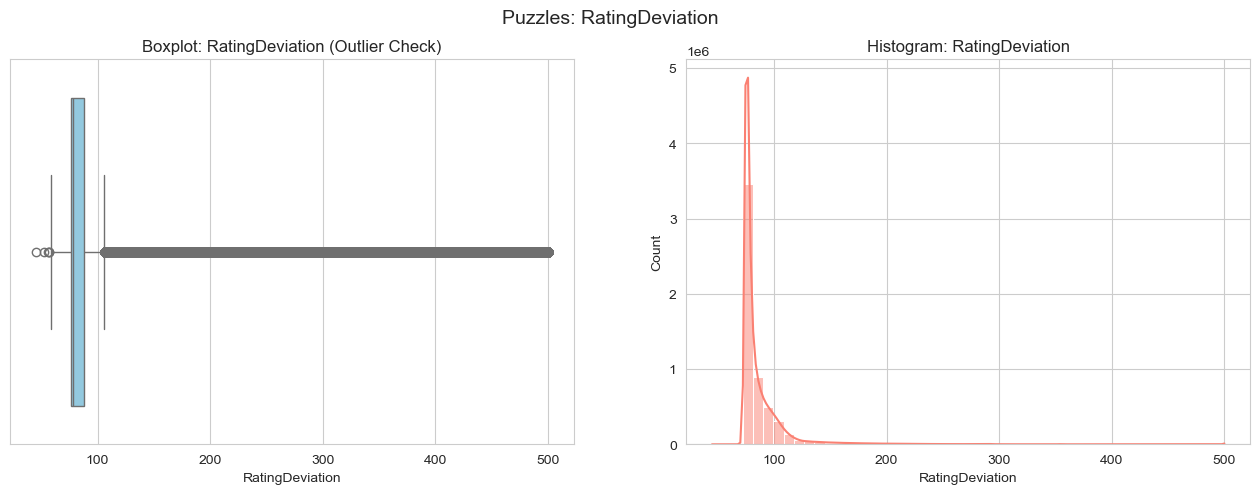

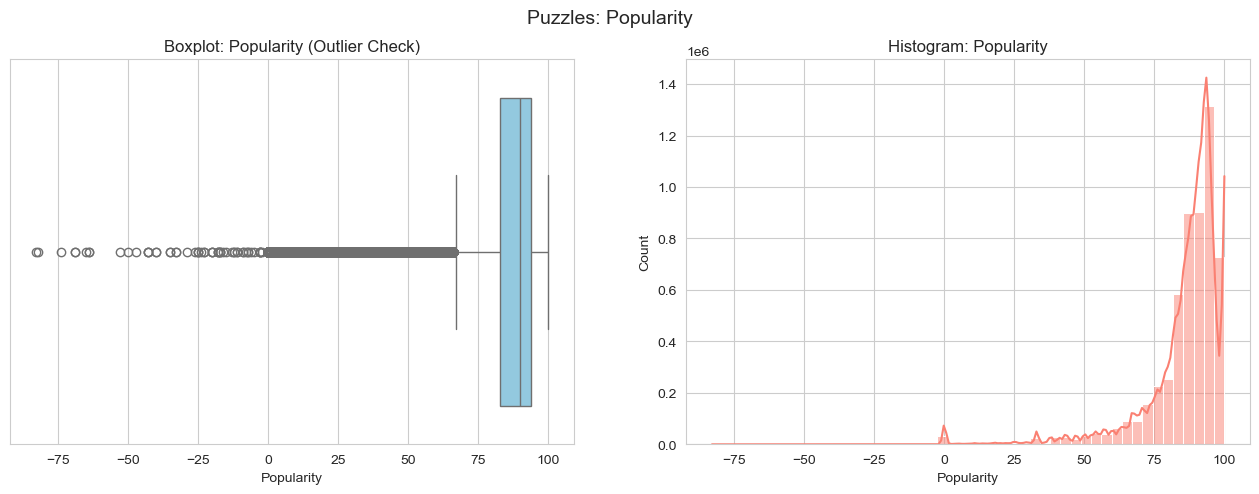

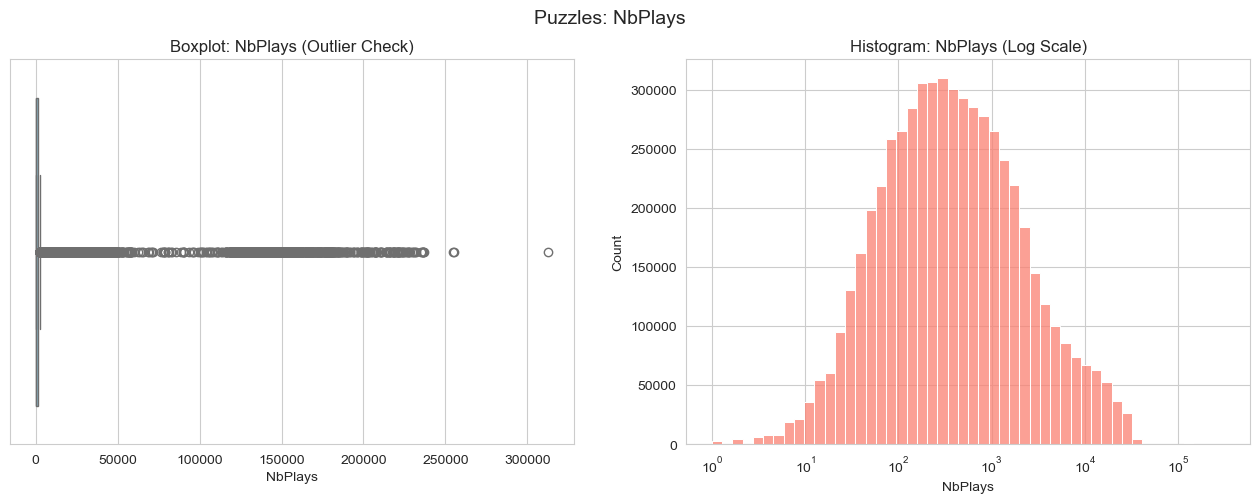

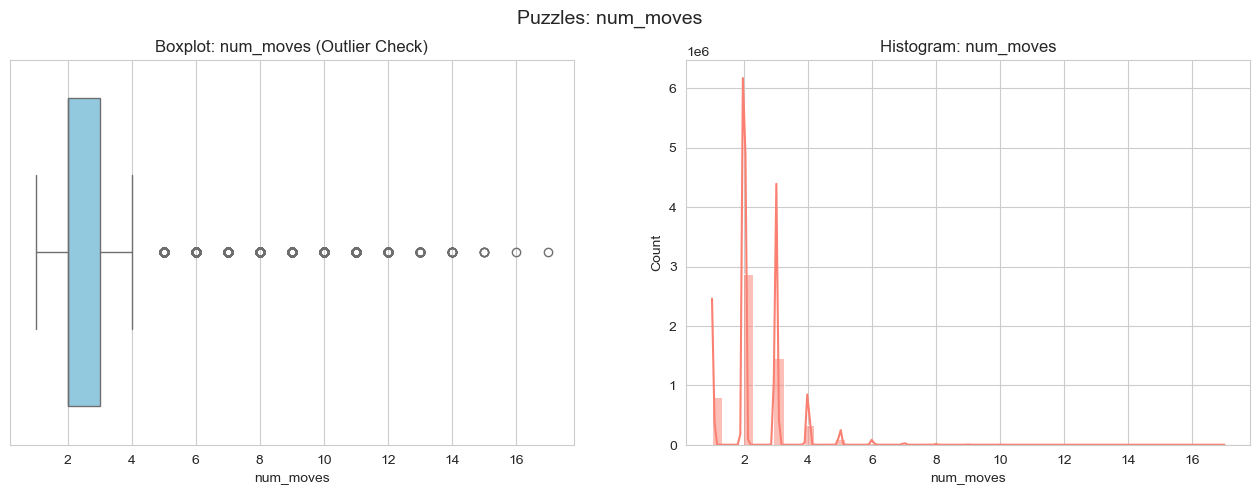


--- Visualizing Games Dataset ---


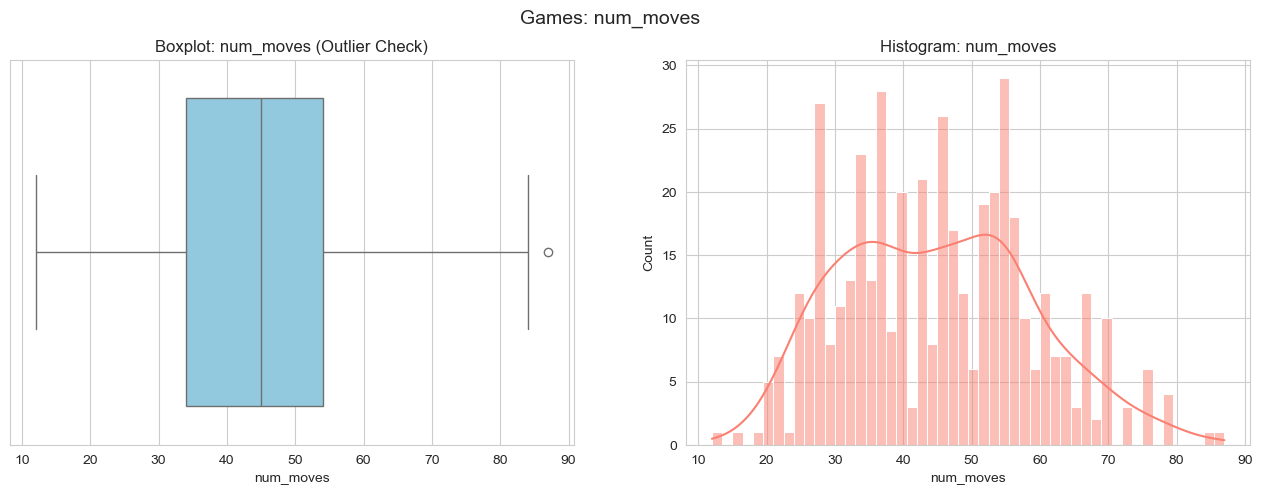

In [9]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'num_moves']

# --- 1) Basic sanity checks ---
print("Summary statistics for numeric columns:")
display(puzzles_df[cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)
display(games_df['num_moves'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)

def visualize_outliers(df, columns, dataset_name):
    """
    Plots a Boxplot (left) and Histogram (right) for each column.
    """
    sns.set_style("whitegrid")
    
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        # --- Plot 1: Boxplot (Horizontal) ---
        sns.boxplot(x=df[col], ax=axes[0], color='skyblue')
        axes[0].set_title(f'Boxplot: {col} (Outlier Check)')
        
        # --- Plot 2: Histogram ---
        # We use a log scale for the histogram if the data is massive (like NbPlays)
        # This allows you to actually SEE the distribution instead of just one bar.
        if df[col].max() > 10000 and df[col].min() >= 0:
            sns.histplot(df[col], ax=axes[1], color='salmon', bins=50, log_scale=True)
            axes[1].set_title(f'Histogram: {col} (Log Scale)')
        else:
            sns.histplot(df[col], ax=axes[1], color='salmon', bins=50, kde=True)
            axes[1].set_title(f'Histogram: {col}')
            
        plt.suptitle(f'{dataset_name}: {col}', fontsize=14)
        plt.show()

# --- EXECUTE VISUALIZATION ---

# 1. Visualize Puzzles
print("--- Visualizing Puzzles Dataset ---")
visualize_outliers(puzzles_df, ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'num_moves'], "Puzzles")

# 2. Visualize Games
print("\n--- Visualizing Games Dataset ---")
visualize_outliers(games_df, ['num_moves'], "Games")


--- CUTOFF ANALYSIS: NbPlays (Removing Low Counts) ---
Cut < 5 plays:  Drops 23580 rows (0.4%)
Cut < 10 plays:  Drops 71762 rows (1.3%)
Cut < 20 plays:  Drops 206205 rows (3.7%)
Cut < 50 plays:  Drops 687941 rows (12.3%)
Cut < 100 plays:  Drops 1327211 rows (23.7%)

--- CUTOFF ANALYSIS: RatingDeviation (Removing Unstable Ratings) ---
Cut > 100 dev:    Drops 695541 rows (12.4%)
Cut > 90 dev:    Drops 1235065 rows (22.1%)
Cut > 85 dev:    Drops 1638123 rows (29.3%)
Cut > 80 dev:    Drops 2298734 rows (41.0%)
Cut > 75 dev:    Drops 4436659 rows (79.2%)


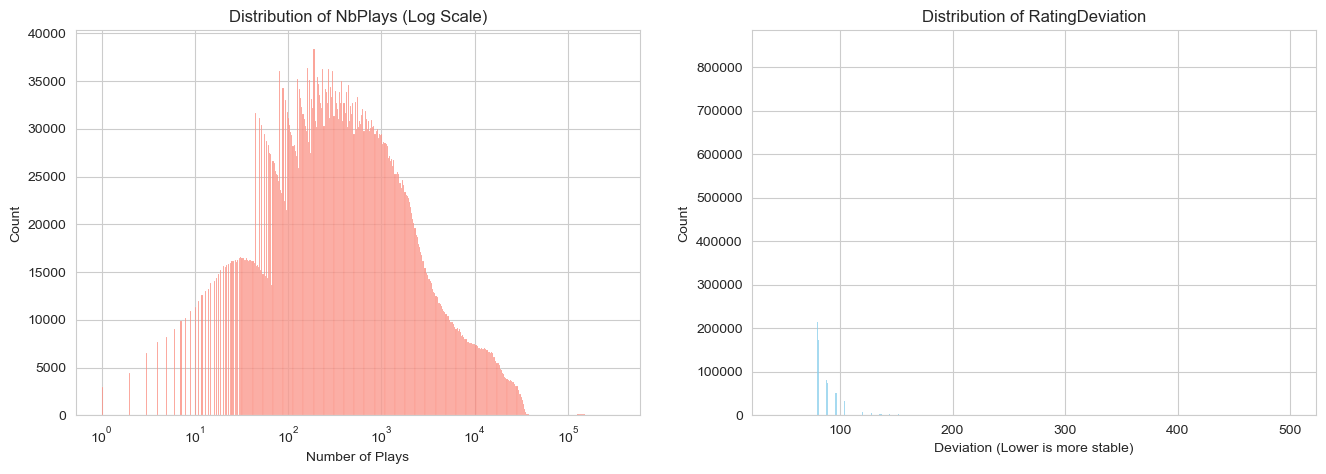

In [10]:


def suggest_cutoffs(df):
    """
    Plots histograms and prints percentiles to help choose cutoffs.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # --- 1. Analyze NbPlays (Low is bad) ---
    sns.histplot(df['NbPlays'], ax=axes[0], color='salmon', log_scale=True)
    axes[0].set_title('Distribution of NbPlays (Log Scale)')
    axes[0].set_xlabel('Number of Plays')
    
    # Calculate "Low Count" candidates
    print("--- CUTOFF ANALYSIS: NbPlays (Removing Low Counts) ---")
    for p in [5, 10, 20, 50, 100]:
        count = len(df[df['NbPlays'] < p])
        print(f"Cut < {p} plays:  Drops {count} rows ({count/len(df):.1%})")
        
    # --- 2. Analyze RatingDeviation (High is bad) ---
    sns.histplot(df['RatingDeviation'], ax=axes[1], color='skyblue')
    axes[1].set_title('Distribution of RatingDeviation')
    axes[1].set_xlabel('Deviation (Lower is more stable)')
    
    # Calculate "High Deviation" candidates
    print("\n--- CUTOFF ANALYSIS: RatingDeviation (Removing Unstable Ratings) ---")
    for d in [100, 90, 85, 80, 75]:
        count = len(df[df['RatingDeviation'] > d])
        print(f"Cut > {d} dev:    Drops {count} rows ({count/len(df):.1%})")

    plt.show()

# Run the analysis
suggest_cutoffs(puzzles_df)

In [11]:
# --- MANUAL THRESHOLDS (We decided the according to the histograms as boxplots were too extreme and classified too many outliers which is not suitable for our dataset) ---

# 1. Puzzles: NbPlays (The "Viral" Cut-off)
# Look at the histogram. Where does the "main body" end and the "long tail" begin?
MAX_PLAYS = 412554    # Example: Delete puzzles with > 50k plays
MIN_PLAYS = 5        # Keep as 0 unless you see weird negatives

# 2. Puzzles: Rating (The "Difficulty" Cut-off)
# Chess ratings usually stay between 600 and 3000.
MIN_RATINGDIV= 0
MAX_RATINGDIV = 400

# 3. Puzzles: Popularity (Usually -100 to +100)
#MIN_POP = -100
#MAX_POP = 100

# 4. Games: Length (The "Real Game" Cut-off)
# Games < 10 moves are usually aborted. Games > 200 are rare marathons.
#MIN_MOVES = 10
#MAX_MOVES = 200

# -----------------------------------------------

def apply_manual_thresholds(df, col, min_val, max_val):
    """
    Keeps only the rows where df[col] is between min_val and max_val.
    Prints how many rows were dropped.
    """
    initial = len(df)
    
    # The Filter
    clean_df = df[(df[col] >= min_val) & (df[col] <= max_val)]
    
    dropped = initial - len(clean_df)
    print(f"[{col}] Filter ({min_val} to {max_val}): Dropped {dropped} rows ({dropped/initial:.2%})")
    
    return clean_df

# --- EXECUTE FILTERS ---

print("--- Applying Manual Filters to Puzzles ---")
puzzles_df = apply_manual_thresholds(puzzles_df, 'NbPlays', MIN_PLAYS, MAX_PLAYS)
puzzles_df = apply_manual_thresholds(puzzles_df, 'RatingDeviation', MIN_RATINGDIV, MAX_RATINGDIV)
#   puzzles_df = apply_manual_thresholds(puzzles_df, 'Popularity', MIN_POP, MAX_POP)

# print("\n--- Applying Manual Filters to Games ---")
# games_df = apply_manual_thresholds(games_df, 'num_moves', MIN_MOVES, MAX_MOVES)

--- Applying Manual Filters to Puzzles ---
[NbPlays] Filter (5 to 412554): Dropped 23580 rows (0.42%)
[RatingDeviation] Filter (0 to 400): Dropped 1812 rows (0.03%)


## check accuracy after removing outliers

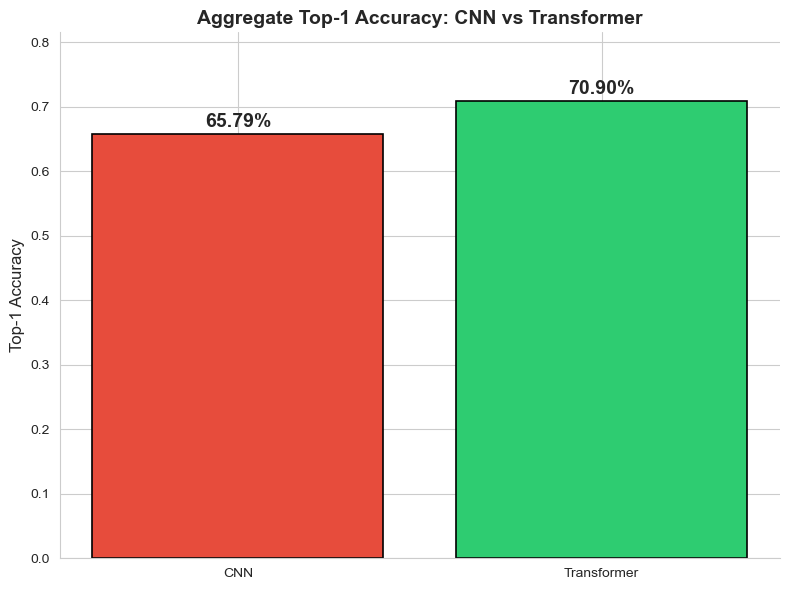

CNN Top-1 Accuracy: 0.6579
Transformer Top-1 Accuracy: 0.7090

Paradox: CNN >= Transformer in aggregate (or ties)


In [12]:

#ask about the preprocessing for the data (lke extracting the ground truth move)

# Compute Top-1 accuracy for CNN and Transformer
cnn_top1_acc = puzzles_df['cnn_first_move_correct'].mean()
tr_top1_acc = puzzles_df['transformer_first_move_correct'].mean()


# Create comparison bar plot showing aggregate accuracies
fig, ax = plt.subplots(figsize=(8, 6))

models = ['CNN', 'Transformer']
accuracies = [cnn_top1_acc, tr_top1_acc]
colors = ['#e74c3c','#2ecc71']

bars = ax.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{acc:.2%}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
ax.set_ylabel('Top-1 Accuracy', fontsize=12)
ax.set_title('Aggregate Top-1 Accuracy: CNN vs Transformer', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(accuracies) * 1.15)  # Add space for labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#Display the paradox
print(f"CNN Top-1 Accuracy: {cnn_top1_acc:.4f}")
print(f"Transformer Top-1 Accuracy: {tr_top1_acc:.4f}")
print("\nParadox: CNN >= Transformer in aggregate (or ties)")


## Data Analysis

## statistical check

In [13]:
# import numpy as np

# # Number of iterations
# n_iterations = 1000
# n_size = int(len(puzzles_df) * 0.1) # Sample 10% for speed (or more if you have time)

# gaps = []

# print(f"Running {n_iterations} bootstrap iterations...")

# for i in range(n_iterations):
#     # Resample with replacement
#     sample = puzzles_df.sample(n=n_size, replace=True)
    
#     # Calculate Gap
#     gap = sample['transformer_first_move_correct'].mean() - sample['cnn_first_move_correct'].mean()
#     gaps.append(gap)

# # Calculate Confidence Intervals
# lower = np.percentile(gaps, 2.5)
# upper = np.percentile(gaps, 97.5)
# mean_gap = np.mean(gaps)

# print(f"\n--- Statistical Significance Analysis ---")
# print(f"Mean Gap: {mean_gap:.4f}")
# print(f"95% Confidence Interval: [{lower:.4f}, {upper:.4f}]")

# # Plot Distribution
# plt.figure(figsize=(8, 5))
# sns.histplot(gaps, kde=True, color='green')
# plt.axvline(0, color='red', linestyle='--', label='Zero Difference')
# plt.title('Bootstrap Distribution of the Accuracy Gap')
# plt.xlabel('Accuracy Gap (Transformer - CNN)')
# plt.legend()
# plt.show()

# if lower > 0:
#     print("RESULT: The difference is Statistically Significant (Interval does not contain 0).")
# else:
#     print("RESULT: The difference might be noise.")

In [14]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

cnn = puzzles_df["cnn_first_move_correct"].astype(bool).to_numpy()
tr  = puzzles_df["transformer_first_move_correct"].astype(bool).to_numpy()

b = int(np.sum(cnn & ~tr))  # CNN only
c = int(np.sum(~cnn & tr))  # TR only

table = [[0, b],
         [c, 0]]

res = mcnemar(table, exact=False, correction=True)  # chi-square approx with continuity correction
print("b (cnn_only):", b, "c (tr_only):", c)
print("statistic:", res.statistic, "p-value:", res.pvalue)


b (cnn_only): 342308 c (tr_only): 627434
statistic: 83832.88093637276 p-value: 0.0


Mean Gap: 0.051147
95% CI: [0.050795, 0.051502]


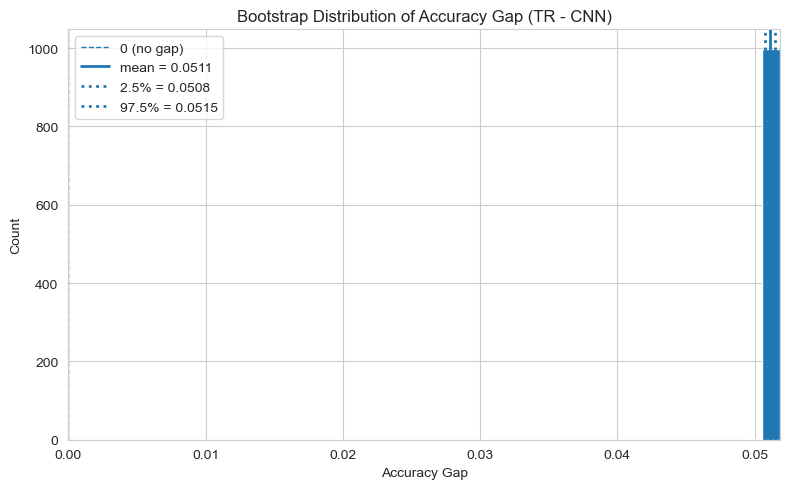

In [15]:
import numpy as np
import matplotlib.pyplot as plt

n_iterations = 1000
rng = np.random.default_rng(0)

# Use float64 for a bit more numeric stability
tr = puzzles_df["transformer_first_move_correct"].to_numpy(dtype=np.float64)
cnn = puzzles_df["cnn_first_move_correct"].to_numpy(dtype=np.float64)

N = len(tr)
gaps = np.empty(n_iterations, dtype=np.float64)

for i in range(n_iterations):
    idx = rng.integers(0, N, size=N)
    gaps[i] = tr[idx].mean() - cnn[idx].mean()

lower, upper = np.percentile(gaps, [2.5, 97.5])
mean_gap = gaps.mean()

print(f"Mean Gap: {mean_gap:.6f}")
print(f"95% CI: [{lower:.6f}, {upper:.6f}]")

# ---- FIXED PLOT ----
pad = (upper - lower) * 0.5  # padding around CI
x_min = min(0, lower - pad)  # include 0 for reference
x_max = upper + pad

plt.figure(figsize=(8, 5))
plt.hist(gaps, bins=40, range=(x_min, x_max))
plt.axvline(0, linestyle="--", linewidth=1, label="0 (no gap)")
plt.axvline(mean_gap, linewidth=2, label=f"mean = {mean_gap:.4f}")
plt.axvline(lower, linestyle=":", linewidth=2, label=f"2.5% = {lower:.4f}")
plt.axvline(upper, linestyle=":", linewidth=2, label=f"97.5% = {upper:.4f}")

plt.title("Bootstrap Distribution of Accuracy Gap (TR - CNN)")
plt.xlabel("Accuracy Gap")
plt.ylabel("Count")
plt.xlim(x_min, x_max)
plt.legend()
plt.tight_layout()
plt.show()


## New Direction: 
Which position features and tactical themes explain the performance differences between Transformers and CNNs on first-move puzzle prediction, and why do these differences translate into much higher win rates in head-to-head match play?

## Understanding the Data

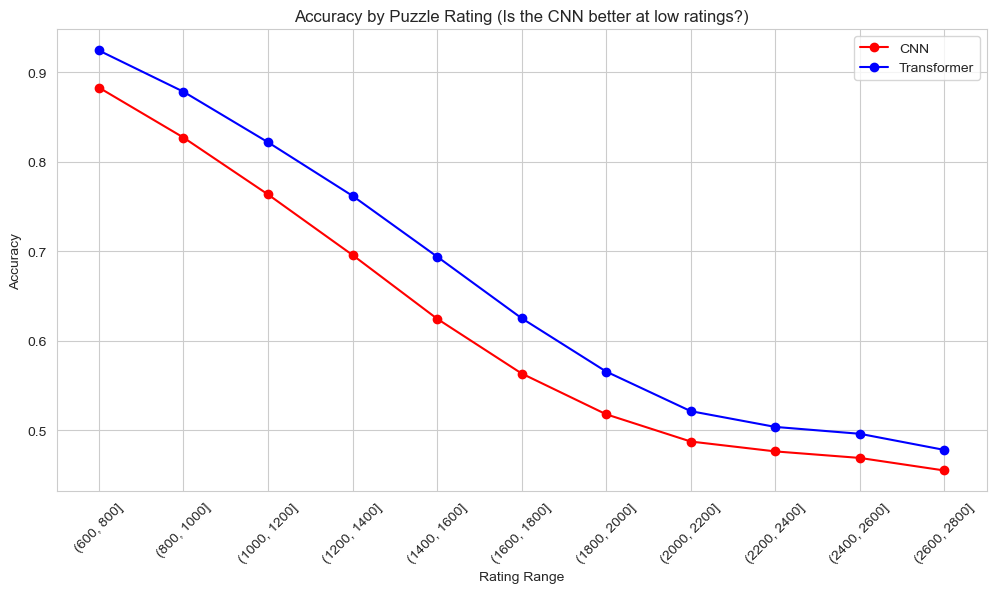

Gap by Rating:


,rating_bin,cnn_first_move_correct,transformer_first_move_correct,Gap (Trans - CNN)
0,"(600, 800]",0.882707,0.924155,0.041448
1,"(800, 1000]",0.826912,0.878108,0.051195
2,"(1000, 1200]",0.763325,0.821651,0.058326
3,"(1200, 1400]",0.695675,0.761765,0.066089
4,"(1400, 1600]",0.624514,0.693874,0.069361
5,"(1600, 1800]",0.563336,0.625068,0.061731
6,"(1800, 2000]",0.517771,0.565481,0.047711
7,"(2000, 2200]",0.487348,0.521272,0.033924
8,"(2200, 2400]",0.476322,0.503671,0.027349
9,"(2400, 2600]",0.469024,0.495999,0.026975


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create Rating Bins (e.g., 600-800, 800-1000...)
# We use the raw dataframe 'df' (or whatever you named your loaded csv)
puzzles_df['rating_bin'] = pd.cut(puzzles_df['Rating'], bins=range(600, 3000, 200))

# Calculate Accuracy per Bin
# We group by the bin and calculate the mean of the boolean 'correct' columns
bin_analysis = puzzles_df.groupby('rating_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean().reset_index()

# Calculate the Gap
bin_analysis['Gap (Trans - CNN)'] = bin_analysis['transformer_first_move_correct'] - bin_analysis['cnn_first_move_correct']

# Visualization
plt.figure(figsize=(12, 6))

# Plot Accuracies
plt.plot(bin_analysis['rating_bin'].astype(str), bin_analysis['cnn_first_move_correct'], marker='o', label='CNN', color='red')
plt.plot(bin_analysis['rating_bin'].astype(str), bin_analysis['transformer_first_move_correct'], marker='o', label='Transformer', color='blue')

plt.title('Accuracy by Puzzle Rating (Is the CNN better at low ratings?)')
plt.xlabel('Rating Range')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Print the table to find the smallest gap
print("Gap by Rating:")
display(bin_analysis)

--- All Themes: accuracy + gap + support ---


,n,cnn_acc,tr_acc,Gap
Theme,,,,
enPassant,7963,0.465402,0.405249,-0.060153
xRayAttack,19708,0.511823,0.501827,-0.009996
bodenMate,3267,0.647383,0.640955,-0.006428
zugzwang,57526,0.725289,0.722560,-0.002729
pawnEndgame,203656,0.710590,0.711307,0.000717
...,...,...,...,...
capturingDefender,37890,0.436157,0.513698,0.077540
pin,337772,0.535107,0.621407,0.086301
anastasiaMate,6603,0.562472,0.650613,0.088142


<Figure size 1200x600 with 0 Axes>

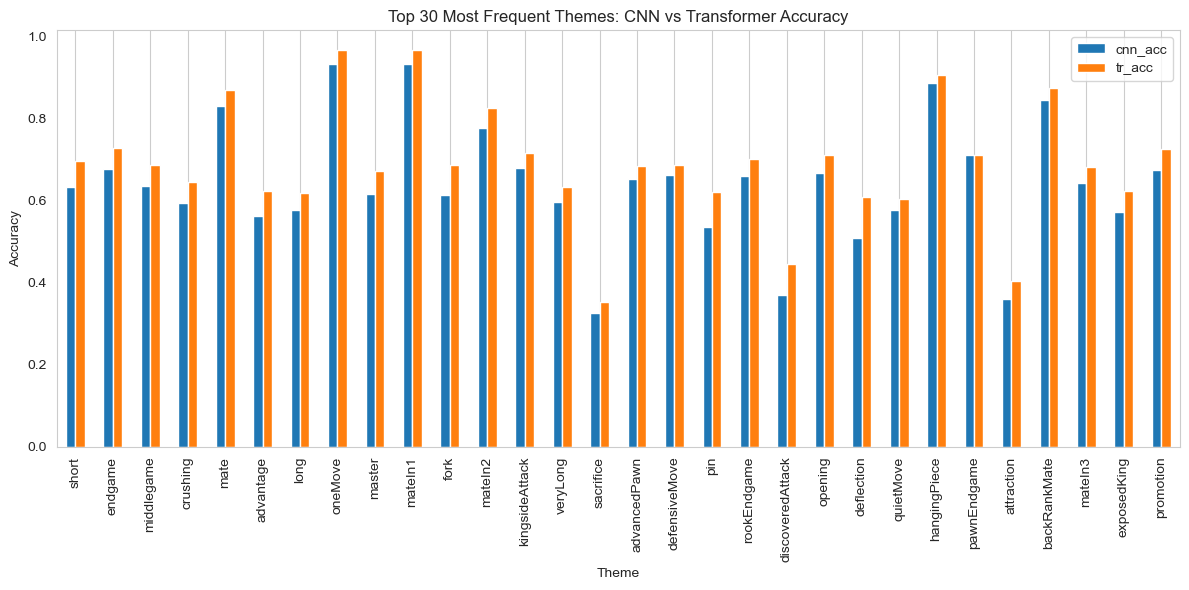

<Figure size 1200x600 with 0 Axes>

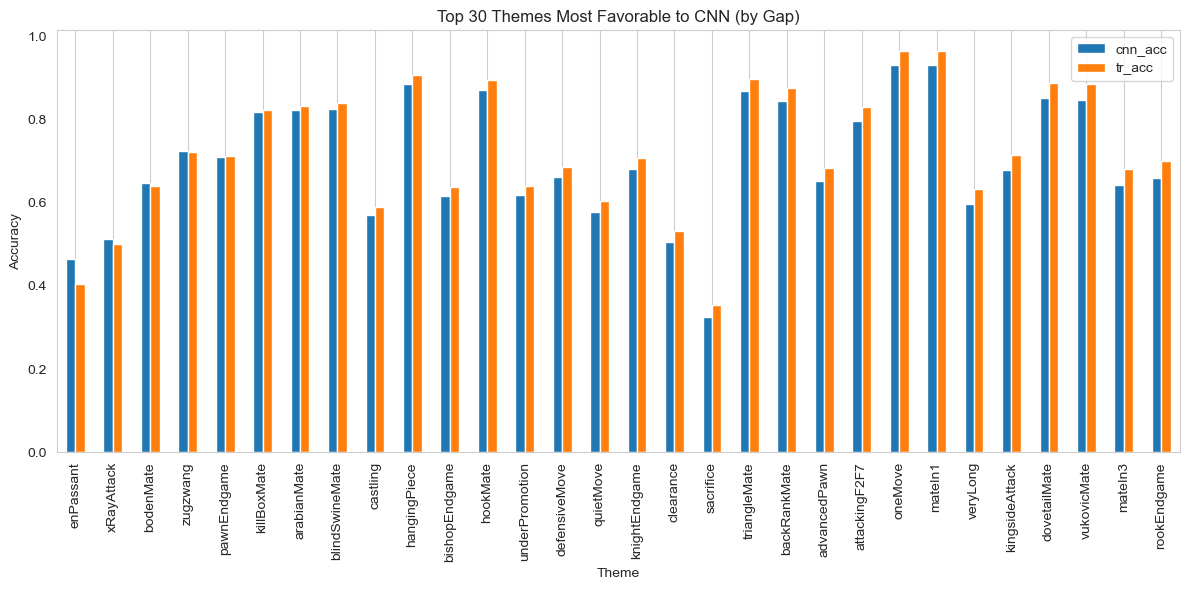

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Explode Themes (keep all themes; handle NaNs + extra spaces)
exploded = (
    puzzles_df
    .dropna(subset=["Themes"])
    .assign(Theme=puzzles_df["Themes"].astype(str).str.split())
    .explode("Theme")
)

# Remove empty tokens just in case
exploded = exploded[exploded["Theme"].notna() & exploded["Theme"].ne("")]

# 2) Accuracy + support per theme (ALL themes)
theme_stats = (
    exploded.groupby("Theme")
    .agg(
        n=("Theme", "size"),
        cnn_acc=("cnn_first_move_correct", "mean"),
        tr_acc=("transformer_first_move_correct", "mean"),
    )
)

theme_stats["Gap"] = theme_stats["tr_acc"] - theme_stats["cnn_acc"]

print("--- All Themes: accuracy + gap + support ---")
display(theme_stats.sort_values("Gap"))  # CNN-leaning at top (most negative gaps)

# Optional: save all themes table
theme_stats.to_csv("theme_stats_all.csv")

# 3) Plotting (all themes is unreadable). Plot Top-K by support or by gap.
TOP_K = 30

# Example A: most frequent themes (best for stability)
top_by_support = theme_stats.sort_values("n", ascending=False).head(TOP_K)

plt.figure(figsize=(12, 6))
top_by_support[["cnn_acc","tr_acc"]].plot(kind="bar", figsize=(12,6))
plt.title(f"Top {TOP_K} Most Frequent Themes: CNN vs Transformer Accuracy")
plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Example B: where CNN is strongest (but avoid tiny-n noise: still show n)
top_cnn = theme_stats.sort_values("Gap").head(TOP_K)

plt.figure(figsize=(12, 6))
top_cnn[["cnn_acc","tr_acc"]].plot(kind="bar", figsize=(12,6))
plt.title(f"Top {TOP_K} Themes Most Favorable to CNN (by Gap)")
plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## lets take a closer look at the themes the CNN is better than the Transformer

--- Themes where CNN Outperforms Transformer ---


,cnn_first_move_correct,transformer_first_move_correct,CNN_Advantage
Theme,,,
enPassant,0.465539,0.405514,0.060025
xRayAttack,0.511499,0.501491,0.010008
bodenMate,0.647616,0.641198,0.006418
zugzwang,0.725410,0.722588,0.002823
pawnEndgame,0.710683,0.711363,-0.000680
killBoxMate,0.819151,0.822092,-0.002941
arabianMate,0.822384,0.832725,-0.010341
blindSwineMate,0.826285,0.838547,-0.012262
hangingPiece,0.886230,0.906020,-0.019790


/var/folders/k7/3mgyrbss4l18j9dj7h41t4sc0000gp/T/ipykernel_44375/1944210570.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnn_favorites['CNN_Advantage'], y=cnn_favorites.index, palette='Reds_r')


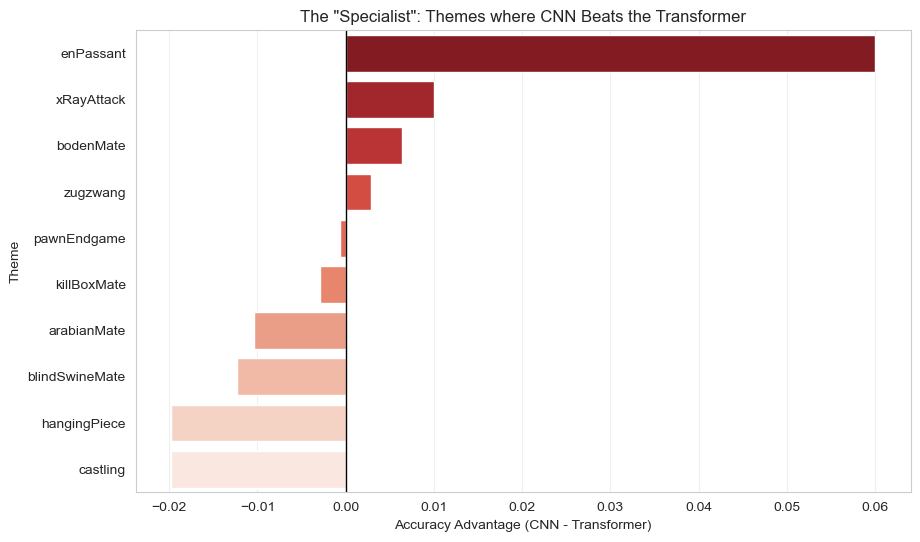


CNN 'Revenge' Count: 343786 puzzles
Avg Rating of Revenge Puzzles: 1672
Global Avg Rating: 1484


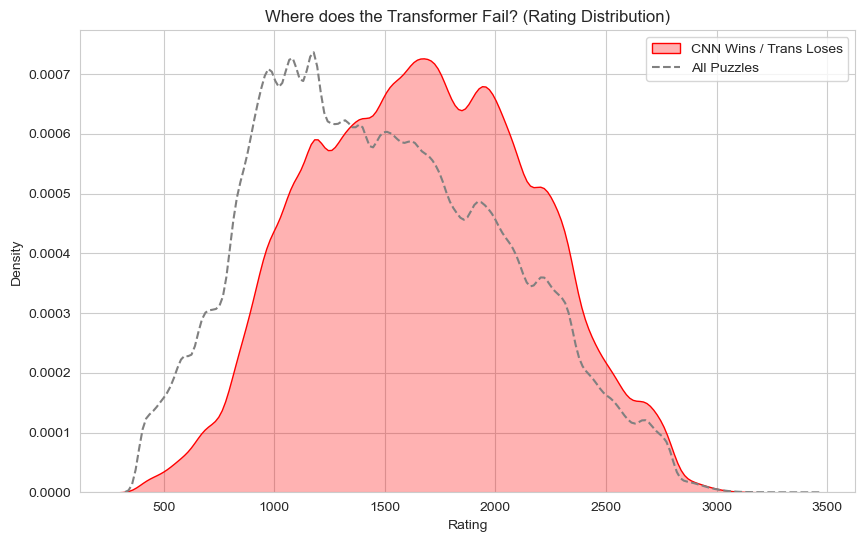

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a copy to avoid warnings
df = raw_df.copy()

# --- 1. THEME ANALYSIS (The "Specialist" Argument) ---
# Explode themes to analyze them individually
exploded_themes = df.dropna(subset=['Themes']).assign(Theme=df['Themes'].str.split(' ')).explode('Theme')

# Filter for themes with at least 500 puzzles (to ensure statistical significance)
theme_counts = exploded_themes['Theme'].value_counts()
valid_themes = theme_counts[theme_counts > 500].index
theme_data = exploded_themes[exploded_themes['Theme'].isin(valid_themes)]

# Calculate accuracy per theme
theme_perf = theme_data.groupby('Theme')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# Calculate "CNN Advantage" (Positive means CNN wins)
theme_perf['CNN_Advantage'] = theme_perf['cnn_first_move_correct'] - theme_perf['transformer_first_move_correct']

# Get the top 10 themes where CNN is strongest
cnn_favorites = theme_perf.sort_values('CNN_Advantage', ascending=False).head(10)

print("--- Themes where CNN Outperforms Transformer ---")
display(cnn_favorites)

# Visualization 1: CNN's Strongest Themes
plt.figure(figsize=(10, 6))
sns.barplot(x=cnn_favorites['CNN_Advantage'], y=cnn_favorites.index, palette='Reds_r')
plt.axvline(0, color='black', linewidth=1)
plt.title('The "Specialist": Themes where CNN Beats the Transformer')
plt.xlabel('Accuracy Advantage (CNN - Transformer)')
plt.grid(axis='x', alpha=0.3)
plt.show()

# --- 2. RATING ANALYSIS (The "Complexity" Argument) ---
# Bin ratings into groups of 200
df['rating_bin'] = pd.cut(df['Rating'], bins=range(600, 3000, 200))

# Calculate accuracy per bin
rating_stats = df.groupby('rating_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# Visualization 2: Accuracy Curves
# plt.figure(figsize=(12, 6))
# plt.plot(rating_stats.index.astype(str), rating_stats['cnn_first_move_correct'], marker='o', label='CNN', color='red', linewidth=2)
# plt.plot(rating_stats.index.astype(str), rating_stats['transformer_first_move_correct'], marker='o', label='Transformer', color='blue', linewidth=2)

# Highlight the crossover point
# plt.title('Accuracy by Difficulty: Does CNN win on "Easy" puzzles?')
# plt.xlabel('Puzzle Rating')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.xticks(rotation=45)
# plt.show()

# --- 3. REVENGE ANALYSIS (The "Blind Spot" Argument) ---
# Isolate puzzles where CNN is RIGHT and Transformer is WRONG
revenge_df = df[(df['cnn_first_move_correct'] == 1) & (df['transformer_first_move_correct'] == 0)]

print(f"\nCNN 'Revenge' Count: {len(revenge_df)} puzzles")
print(f"Avg Rating of Revenge Puzzles: {revenge_df['Rating'].mean():.0f}")
print(f"Global Avg Rating: {df['Rating'].mean():.0f}")

# Visualization 3: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(revenge_df['Rating'], fill=True, color='red', label='CNN Wins / Trans Loses', alpha=0.3)
sns.kdeplot(df['Rating'], linestyle='--', color='gray', label='All Puzzles')
plt.title('Where does the Transformer Fail? (Rating Distribution)')
plt.xlabel('Rating')
plt.legend()
plt.show()

,n,cnn_acc,tr_acc,gap
puzzle_len_bin,,,,
1-2,793672,0.931904,0.965587,0.033683
3-4,2857362,0.633186,0.696611,0.063424
5-6,1460989,0.576342,0.618192,0.041850
7-10,417874,0.594430,0.629829,0.035398
11+,44797,0.627966,0.655490,0.027524


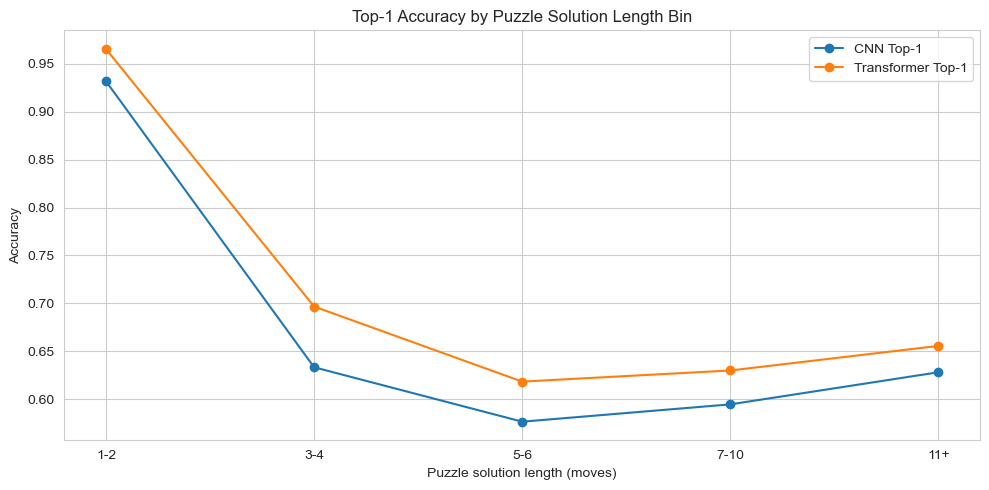

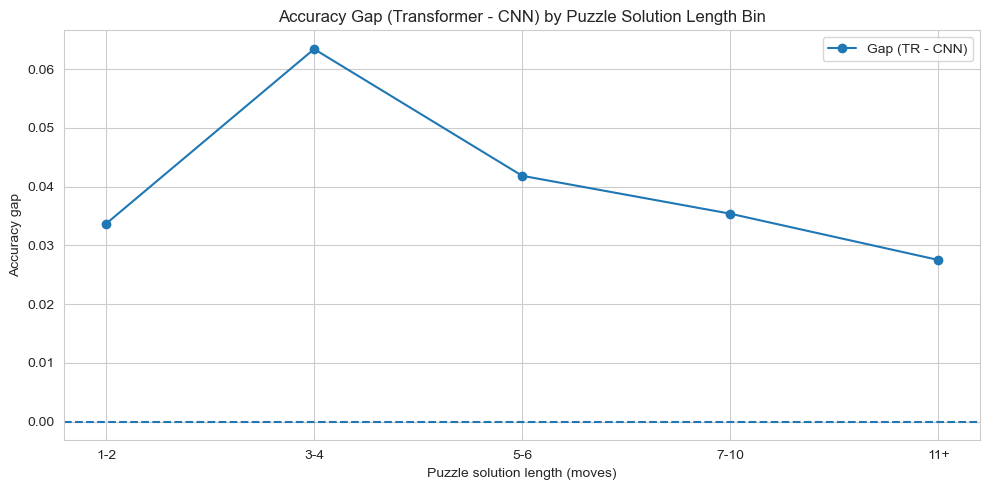

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Build/ensure puzzle solution length ---
# Uses "solution_len" if you already made it; otherwise compute from Moves
if "solution_len" not in puzzles_df.columns:
    puzzles_df["solution_len"] = puzzles_df["Moves"].fillna("").astype(str).str.split().str.len()

# Define bins (tweak as you like)
bins = [0, 2, 4, 6, 10, 1000]
labels = ["1-2", "3-4", "5-6", "7-10", "11+"]

puzzles_df["puzzle_len_bin"] = pd.cut(puzzles_df["solution_len"], bins=bins, labels=labels)

# Aggregate
puz = (puzzles_df.groupby("puzzle_len_bin", observed=True)
       .agg(n=("solution_len", "size"),
            cnn_acc=("cnn_first_move_correct", "mean"),
            tr_acc=("transformer_first_move_correct", "mean"))
       .assign(gap=lambda t: t["tr_acc"] - t["cnn_acc"]))

display(puz)

# Plot accuracies
plt.figure(figsize=(10,5))
plt.plot(puz.index.astype(str), puz["cnn_acc"], marker="o", label="CNN Top-1")
plt.plot(puz.index.astype(str), puz["tr_acc"], marker="o", label="Transformer Top-1")
plt.title("Top-1 Accuracy by Puzzle Solution Length Bin")
plt.xlabel("Puzzle solution length (moves)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot gap (TR - CNN)
plt.figure(figsize=(10,5))
plt.plot(puz.index.astype(str), puz["gap"], marker="o", label="Gap (TR - CNN)")
plt.axhline(0, linestyle="--")
plt.title("Accuracy Gap (Transformer - CNN) by Puzzle Solution Length Bin")
plt.xlabel("Puzzle solution length (moves)")
plt.ylabel("Accuracy gap")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/Users/garah/miniconda3/envs/chess_policy_comparison/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


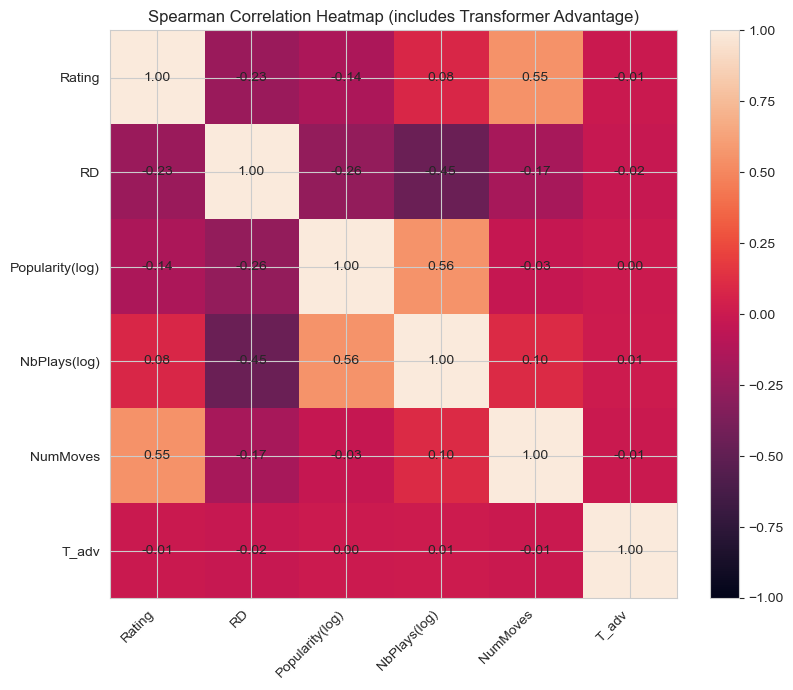

,Rating,RatingDeviation,Popularity_log,NbPlays_log,num_moves,transformer_advantage
Rating,1.000000,-0.231648,-0.144463,0.082345,0.547226,-0.007537
RatingDeviation,-0.231648,1.000000,-0.260806,-0.449407,-0.169794,-0.019784
Popularity_log,-0.144463,-0.260806,1.000000,0.555237,-0.027983,0.004074
NbPlays_log,0.082345,-0.449407,0.555237,1.000000,0.103444,0.010541
num_moves,0.547226,-0.169794,-0.027983,0.103444,1.000000,-0.006146
transformer_advantage,-0.007537,-0.019784,0.004074,0.010541,-0.006146,1.000000


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 0) Create "transformer_advantage" ---
# +1: transformer correct and cnn wrong
#  0: both same (both correct or both wrong)
# -1: transformer wrong and cnn correct
puzzles_df = puzzles_df.copy()
puzzles_df['transformer_advantage'] = (
    puzzles_df['transformer_first_move_correct'].astype(int)
    - puzzles_df['cnn_first_move_correct'].astype(int)
)

# --- 1) Select columns and build a clean numeric frame ---
base_cols = ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'num_moves', 'transformer_advantage']
corr_df = puzzles_df[base_cols].copy()

# log1p for heavy-tailed fields (optional; doesn't affect Spearman ranks)
corr_df['Popularity_log'] = np.log1p(corr_df['Popularity'])
corr_df['NbPlays_log'] = np.log1p(corr_df['NbPlays'])

# Use log versions instead of raw popularity/plays
use_cols = ['Rating', 'RatingDeviation', 'Popularity_log', 'NbPlays_log', 'num_moves', 'transformer_advantage']
corr_df = corr_df[use_cols].dropna()

# --- 2) Correlation (Spearman recommended here) ---
corr = corr_df.corr(method='spearman')

# --- 3) Plot heatmap (matplotlib only) ---
fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(corr.values, vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(use_cols)))
ax.set_yticks(np.arange(len(use_cols)))

pretty_labels = ['Rating', 'RD', 'Popularity(log)', 'NbPlays(log)', 'NumMoves', 'T_adv']
ax.set_xticklabels(pretty_labels, rotation=45, ha='right')
ax.set_yticklabels(pretty_labels)

# annotate cells
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', fontsize=10)

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Spearman Correlation Heatmap (includes Transformer Advantage)")
plt.tight_layout()
plt.show()

corr


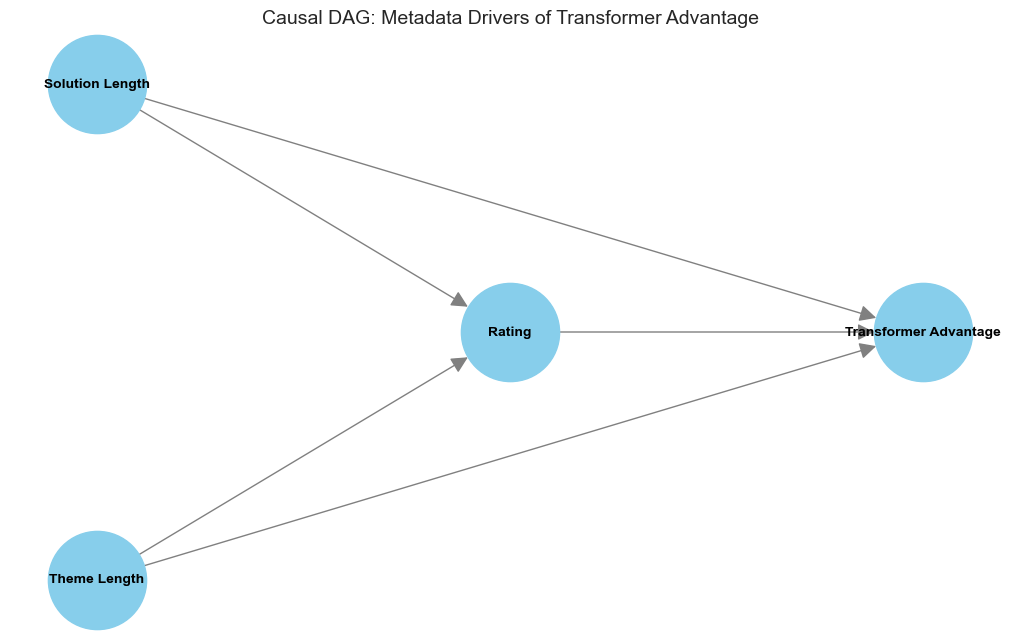

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the DAG
initial_dag = nx.DiGraph()

# Define Edges
initial_edges = [
    ("Solution Length", "Rating"),
    ("Theme Length", "Rating"),
    ("Solution Length", "Transformer Advantage"),
    ("Theme Length", "Transformer Advantage"),
    ("Rating", "Transformer Advantage")
]

initial_dag.add_edges_from(initial_edges)

# Plot
plt.figure(figsize=(10, 6))
pos = {
    "Solution Length": [0, 1],
    "Theme Length": [0, -1],
    "Rating": [2, 0],
    "Transformer Advantage": [4, 0]
}

nx.draw(initial_dag, pos, with_labels=True, node_color='skyblue', 
        node_size=5000, font_size=10, font_weight='bold', 
        arrowsize=25, edge_color='gray')

plt.title("Causal DAG: Metadata Drivers of Transformer Advantage", fontsize=14)
plt.show()

winner_class,CNN,Draw,Transformer,Total,Transformer_pct,CNN_pct,Draw_pct
game_len_bin,,,,,,,
<40,72,30,88,190,46.315789,37.894737,15.789474
40-80,73,62,126,261,48.275862,27.969349,23.754789
80-120,1,0,1,2,50.000000,50.000000,0.000000


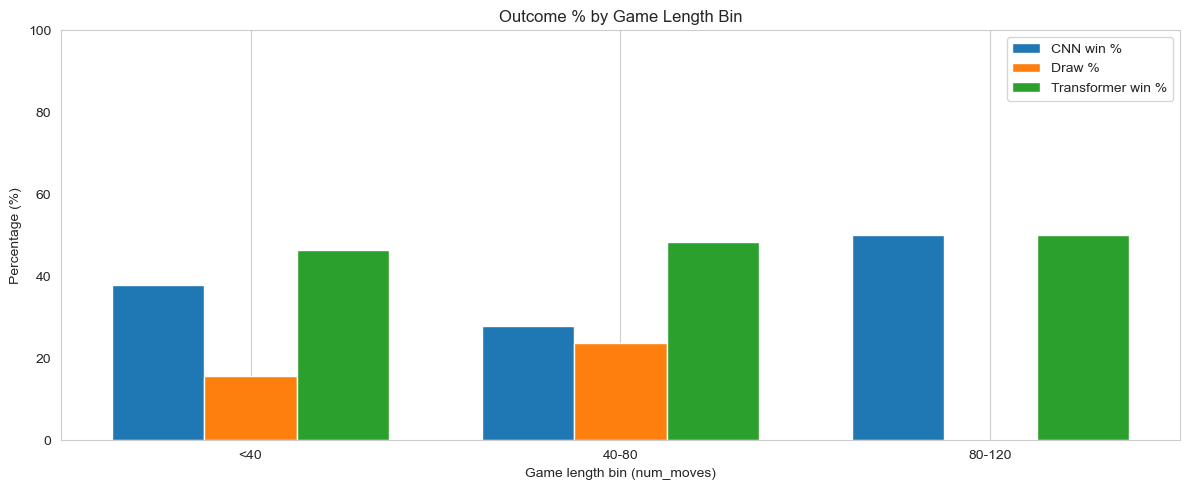

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CNN_NAME = "AuraChessCNN"
TR_NAME  = "AuraChessTransformer"

# 1) Bin game length
bins = [0, 40, 80, 120, 200, 10_000]
labels = ["<40", "40-80", "80-120", "120-200", "200+"]

games_df["game_len_bin"] = pd.cut(games_df["num_moves"], bins=bins, labels=labels)

# 2) Winner class
def winner_class(w):
    if w == TR_NAME:
        return "Transformer"
    if w == CNN_NAME:
        return "CNN"
    return "Draw"

games_df["winner_class"] = games_df["winner"].apply(winner_class)

# 3) Counts and percentages per bin
counts = (games_df.groupby(["game_len_bin", "winner_class"], observed=True)
                  .size()
                  .unstack(fill_value=0))

for col in ["Transformer", "CNN", "Draw"]:
    if col not in counts.columns:
        counts[col] = 0

counts["Total"] = counts[["Transformer", "CNN", "Draw"]].sum(axis=1)

pct = counts[["Transformer", "CNN", "Draw"]].div(counts["Total"], axis=0) * 100
display(counts.join(pct.add_suffix("_pct")))

#OPTIONAL: If you also want Draw% as a third bar:
width = 0.25
x = np.arange(len(pct))   # <-- add this line

plt.figure(figsize=(12, 5))
plt.bar(x - width, pct["CNN"].values, width, label="CNN win %")
plt.bar(x,         pct["Draw"].values, width, label="Draw %")
plt.bar(x + width, pct["Transformer"].values, width, label="Transformer win %")
plt.xticks(x, pct.index.astype(str))
plt.title("Outcome % by Game Length Bin")
plt.xlabel("Game length bin (num_moves)")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.grid(axis="y")
plt.legend()
plt.tight_layout()
plt.show()


# we want to check why in the long games the two models perform the same

# Sub-Question 2: 
"What distinct 'cognitive signatures' define the specialized expertise of each architecture?"

TR-only: 627434
CNN-only: 342308


,Theme,KL_Contribution
0,short,0.015728
9,mateIn1,0.013697
7,oneMove,0.013637
4,mate,0.012224
21,deflection,0.008269
...,...,...
16,defensiveMove,-0.005638
13,veryLong,-0.005860
14,sacrifice,-0.007564
3,crushing,-0.008091


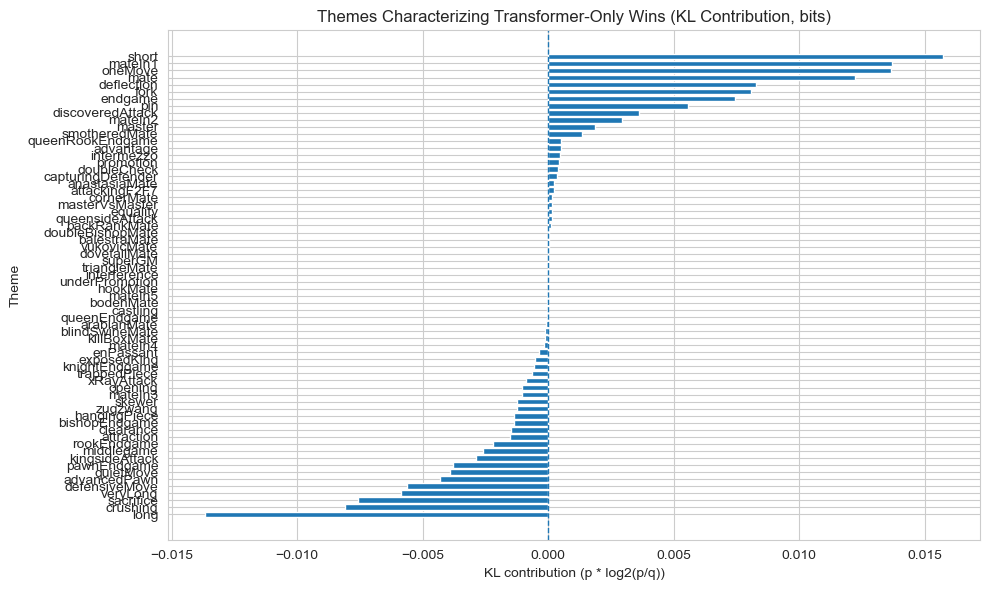

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Disagreement sets
tr_only = puzzles_df[(puzzles_df["transformer_first_move_correct"] == 1) &
                     (puzzles_df["cnn_first_move_correct"] == 0)].copy()

cnn_only = puzzles_df[(puzzles_df["cnn_first_move_correct"] == 1) &
                      (puzzles_df["transformer_first_move_correct"] == 0)].copy()

print("TR-only:", len(tr_only))
print("CNN-only:", len(cnn_only))

def theme_counts(df):
    s = df["Themes"].fillna("").astype(str).str.split()
    exploded = s.explode()
    exploded = exploded[exploded.ne("")]  # remove empties
    return exploded.value_counts()

# Vocabulary: top K themes overall (or use all themes)
K = 25
all_top = theme_counts(puzzles_df).head(K).index

dist_tr  = theme_counts(tr_only).reindex(all_top).fillna(0)
dist_cnn = theme_counts(cnn_only).reindex(all_top).fillna(0)

# Proper epsilon smoothing
eps = 1e-9
p = (dist_tr  + eps) / (dist_tr  + eps).sum()
q = (dist_cnn + eps) / (dist_cnn + eps).sum()

# KL contributions (in bits)
kl_contrib = p * np.log2(p / q)

kl_df = (pd.DataFrame({"Theme": all_top, "KL_Contribution": kl_contrib.values})
           .sort_values("KL_Contribution", ascending=False))

display(kl_df.head(25))

# Plot (horizontal bars)
plt.figure(figsize=(10, 6))
plt.barh(kl_df["Theme"][::-1], kl_df["KL_Contribution"][::-1])
plt.axvline(0, linestyle="--", linewidth=1)
plt.title("Themes Characterizing Transformer-Only Wins (KL Contribution, bits)")
plt.xlabel("KL contribution (p * log2(p/q))")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()


In [25]:
pd.set_option('display.max_rows', 100)
display(kl_df)

,Theme,KL_Contribution
0,short,1.572825e-02
9,mateIn1,1.369707e-02
7,oneMove,1.363682e-02
4,mate,1.222390e-02
21,deflection,8.269143e-03
10,fork,8.068828e-03
1,endgame,7.424518e-03
17,pin,5.572877e-03
19,discoveredAttack,3.619930e-03
11,mateIn2,2.920950e-03


Rating distribution (TR-only vs CNN-only)  KL(P||Q) = 0.036816 bits


,bin,P_TR_only,Q_CNN_only,support,KL_contrib_bits
1,800-1k,0.091294,0.065245,79615,0.044245
2,1k-1.2k,0.131964,0.106892,119389,0.040117
3,1.2-1.4k,0.135705,0.116968,125185,0.029090
0,<800,0.044459,0.028930,37798,0.027560
4,1.4-1.6k,0.143894,0.131277,135221,0.019051
5,1.6-1.8k,0.138662,0.143003,135952,-0.006167
9,2.6k+,0.022375,0.031545,24837,-0.011087
6,1.8-2.0k,0.112237,0.132354,115727,-0.026697
7,2.0-2.2k,0.084811,0.112492,91720,-0.034561
8,2.2-2.6k,0.094600,0.131294,104298,-0.044736


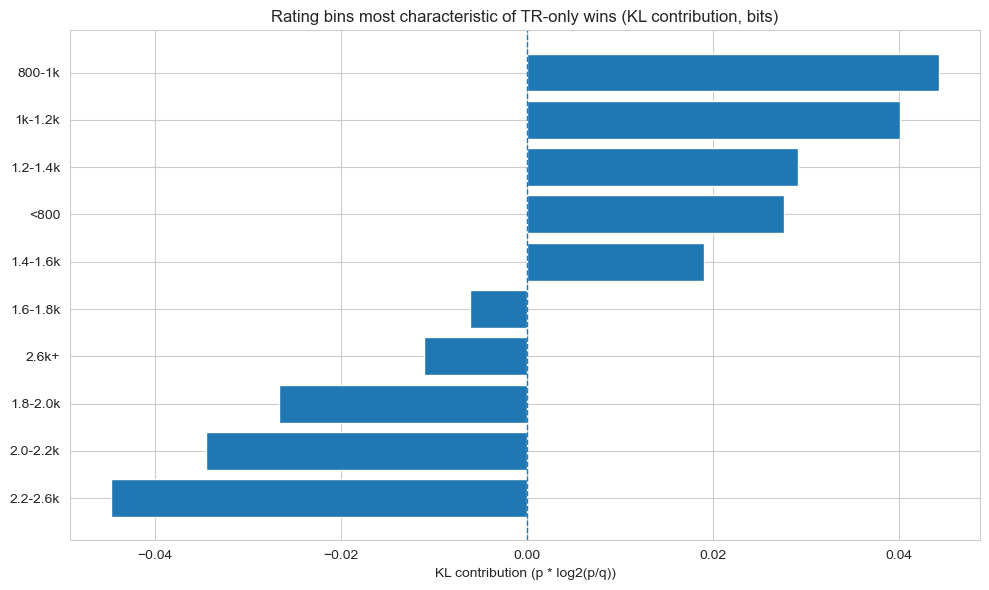

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eps = 1e-9

# --- Disagreement sets ---
tr_only = puzzles_df[(puzzles_df["transformer_first_move_correct"] == 1) &
                     (puzzles_df["cnn_first_move_correct"] == 0)].copy()

cnn_only = puzzles_df[(puzzles_df["cnn_first_move_correct"] == 1) &
                      (puzzles_df["transformer_first_move_correct"] == 0)].copy()

def kl_binned(P_vals, Q_vals, bins, labels=None, title=""):
    # bin values
    P_bin = pd.cut(P_vals, bins=bins, labels=labels, include_lowest=True)
    Q_bin = pd.cut(Q_vals, bins=bins, labels=labels, include_lowest=True)

    # counts aligned on same bins
    p_counts = P_bin.value_counts().sort_index()
    q_counts = Q_bin.value_counts().sort_index()
    all_bins = p_counts.index.union(q_counts.index)

    p_counts = p_counts.reindex(all_bins).fillna(0)
    q_counts = q_counts.reindex(all_bins).fillna(0)

    # smoothed probabilities
    p = (p_counts + eps) / (p_counts + eps).sum()
    q = (q_counts + eps) / (q_counts + eps).sum()

    # per-bin KL contributions + total KL (in bits)
    contrib = p * np.log2(p / q)
    KL = float(contrib.sum())

    out = pd.DataFrame({
        "bin": all_bins.astype(str),
        "P_TR_only": p.values,
        "Q_CNN_only": q.values,
        "support": (p_counts + q_counts).values,
        "KL_contrib_bits": contrib.values
    }).sort_values("KL_contrib_bits", ascending=False)

    print(f"{title}  KL(P||Q) = {KL:.6f} bits")
    return out, KL

# ---- Rating bins (edit as desired) ----
rating_bins = [0, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2600, 4000]
rating_labels = ["<800","800-1k","1k-1.2k","1.2-1.4k","1.4-1.6k","1.6-1.8k","1.8-2.0k","2.0-2.2k","2.2-2.6k","2.6k+"]

rating_df, KL_rating = kl_binned(
    tr_only["Rating"], cnn_only["Rating"],
    bins=rating_bins, labels=rating_labels,
    title="Rating distribution (TR-only vs CNN-only)"
)

display(rating_df)

# plot contributions (show bins that matter most; filter tiny support if you want)
plot_df = rating_df[rating_df["support"] > 10_000].head(12).sort_values("KL_contrib_bits")

plt.figure(figsize=(10,6))
plt.barh(plot_df["bin"], plot_df["KL_contrib_bits"])
plt.axvline(0, linestyle="--", linewidth=1)
plt.title("Rating bins most characteristic of TR-only wins (KL contribution, bits)")
plt.xlabel("KL contribution (p * log2(p/q))")
plt.tight_layout()
plt.show()


Solution length distribution (TR-only vs CNN-only)  KL(P||Q) = 0.028137 bits


,bin,P_TR_only,Q_CNN_only,support,KL_contrib_bits
1,3-4,0.586916,0.546365,555276,0.060622
0,1-2,0.058223,0.028623,46329,0.059643
6,26+,0.000005,0.000009,6,-0.000004
5,16-25,0.001023,0.001376,1113,-0.000437
4,11-15,0.006256,0.008364,6788,-0.002621
3,7-10,0.074405,0.093168,78576,-0.024139
2,5-6,0.273173,0.322096,281654,-0.064927


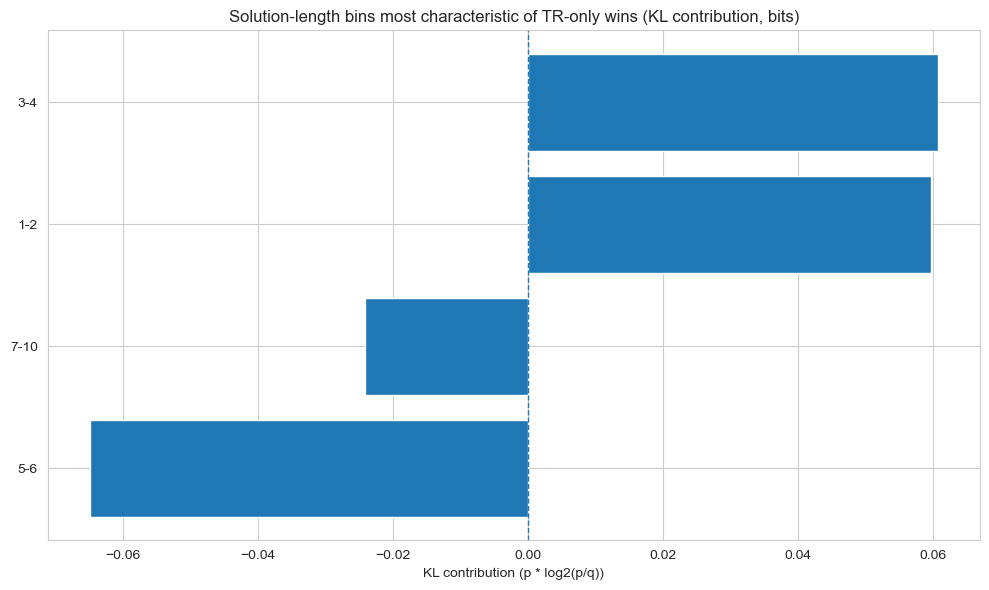

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make sure solution_len exists
if "solution_len" not in puzzles_df.columns:
    puzzles_df["solution_len"] = puzzles_df["Moves"].fillna("").astype(str).str.split().str.len()

# Rebuild disagreement sets with the new column available
tr_only = puzzles_df[(puzzles_df["transformer_first_move_correct"] == 1) &
                     (puzzles_df["cnn_first_move_correct"] == 0)].copy()

cnn_only = puzzles_df[(puzzles_df["cnn_first_move_correct"] == 1) &
                      (puzzles_df["transformer_first_move_correct"] == 0)].copy()

# Length bins (edit)
len_bins = [0, 2, 4, 6, 10, 15, 25, 10_000]
len_labels = ["1-2","3-4","5-6","7-10","11-15","16-25","26+"]

len_df, KL_len = kl_binned(
    tr_only["solution_len"], cnn_only["solution_len"],
    bins=len_bins, labels=len_labels,
    title="Solution length distribution (TR-only vs CNN-only)"
)

display(len_df)

plot_df = len_df[len_df["support"] > 10_000].head(12).sort_values("KL_contrib_bits")

plt.figure(figsize=(10,6))
plt.barh(plot_df["bin"], plot_df["KL_contrib_bits"])
plt.axvline(0, linestyle="--", linewidth=1)
plt.title("Solution-length bins most characteristic of TR-only wins (KL contribution, bits)")
plt.xlabel("KL contribution (p * log2(p/q))")
plt.tight_layout()
plt.show()


# Insights: 

Transformer Signature (Positive KL): Characterized by Fundamentals & Breadth. The Transformer excels in short, mateIn1, and oneMove puzzles, primarily at lower ratings (<1600 Elo). It has nearly double the unique win support (627k vs 342k).

CNN Signature (Negative KL): Characterized by Complexity & Depth. The CNN specializes in long and veryLong puzzles (5+ moves) and high-rated challenges (>2200 Elo). It also leads in "quiet" positional motifs like quietMove and defensiveMove.


Our KL Divergence analysis reveals a Strategic Paradox: while we hypothesized the Transformer would excel in long-horizon strategic sequences, the data shows its advantage is built on Superior Consistency in short-horizon tactical fundamentals.

The CNN functions as a 'Deep Calculator' (specializing in long and high-rated puzzles), but it is more 'brittle' than the Transformer. The Transformer's ~18% win-rate advantage is not driven by deeper calculation, but by a 'Higher Floor'—a robust ability to resolve immediate geometric patterns across the board that the CNN occasionally overlooks.

# Research Question Add-on: The "Knight Hypothesis"

"Does the Transformer’s 'Global Vision' (Attention) handle the non-linear complexity of Knight movements better than the CNN’s local pattern matching?"

In [28]:
def get_piece_from_fen(row):
    try:
        fen = row['FEN']
        # UCI move format is 'e2e4' -> start is 'e2'
        move = row['Moves'].split()[0]
        start_sq = move[:2]
        
        # Convert chess notation (e2) to array indices
        col_map = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5, 'g':6, 'h':7}
        target_col = col_map[start_sq[0]]
        target_row = 8 - int(start_sq[1]) # Rank 8 is index 0 in FEN
        
        # Get board part of FEN
        board_layout = fen.split()[0]
        rows = board_layout.split('/')
        
        # Focus on the specific row
        row_str = rows[target_row]
        
        # FEN rows use numbers for empty squares (e.g., "p3p" means pawn, 3 empty, pawn)
        current_col = 0
        for char in row_str:
            if char.isdigit():
                current_col += int(char)
            else:
                if current_col == target_col:
                    # Return the piece name based on the letter
                    piece_map = {
                        'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 
                        'r': 'Rook', 'q': 'Queen', 'k': 'King'
                    }
                    return piece_map[char.lower()]
                current_col += 1
        return 'Unknown'
    except:
        return 'Unknown'

# Apply to your dataframe
puzzles_df['piece_type'] = puzzles_df.apply(get_piece_from_fen, axis=1)

# Now re-run your Gap analysis
piece_stats = puzzles_df.groupby('piece_type')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean() * 100
piece_stats['Gap'] = piece_stats['transformer_first_move_correct'] - piece_stats['cnn_first_move_correct']

display(piece_stats.sort_values('Gap', ascending=False))

,cnn_first_move_correct,transformer_first_move_correct,Gap
piece_type,,,
Queen,62.955484,68.465913,5.510429
Bishop,64.442575,69.945466,5.502891
Rook,66.772038,72.118034,5.345997
Knight,66.511068,71.668324,5.157256
King,67.968023,73.004115,5.036093
Pawn,65.756097,69.918889,4.162793


In [29]:
import chess

def get_piece_at_start(row):
    try:
        # 1. Initialize the board with the FEN
        board = chess.Board(row['FEN'])
        
        # 2. Get the starting square of the first move (e.g., 'g1' from 'g1f3')
        move_uci = row['Moves'].split()[0]
        start_square_name = move_uci[:2]
        
        # 3. Convert 'g1' to the chess.Square index
        start_square_index = chess.parse_square(start_square_name)
        
        # 4. Get the piece at that square
        piece = board.piece_at(start_square_index)
        
        if piece:
            # Return full name for clarity
            piece_type_map = {
                chess.PAWN: "Pawn",
                chess.KNIGHT: "Knight",
                chess.BISHOP: "Bishop",
                chess.ROOK: "Rook",
                chess.QUEEN: "Queen",
                chess.KING: "King"
            }
            return piece_type_map[piece.piece_type]
        return "Unknown"
    except Exception as e:
        return "Unknown"

# Apply to the 5.6M dataset
puzzles_df['piece_type'] = puzzles_df.apply(get_piece_at_start, axis=1)

/var/folders/k7/3mgyrbss4l18j9dj7h41t4sc0000gp/T/ipykernel_44375/3365058989.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=piece_performance['Gap'], y=piece_performance.index, palette='coolwarm')


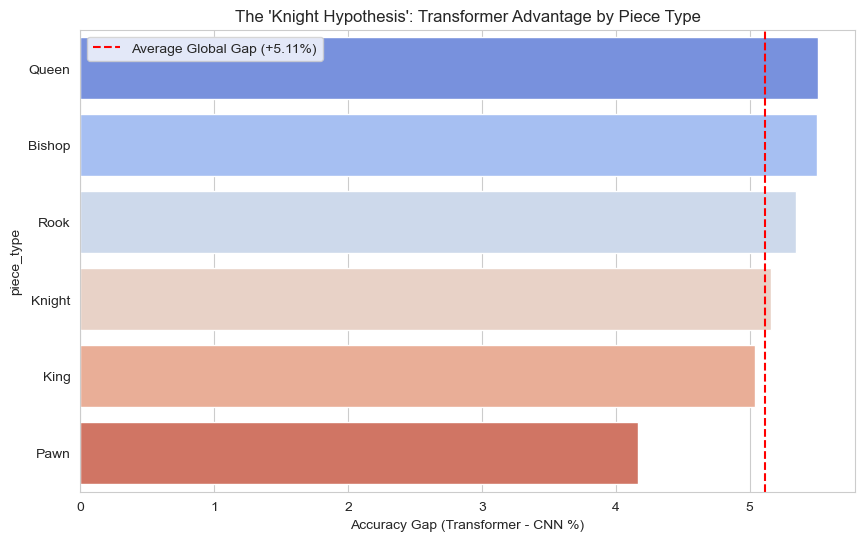

,cnn_first_move_correct,transformer_first_move_correct,Gap
piece_type,,,
Queen,62.955484,68.465913,5.510429
Bishop,64.442575,69.945466,5.502891
Rook,66.772038,72.118034,5.345997
Knight,66.511068,71.668324,5.157256
King,67.968023,73.004115,5.036093
Pawn,65.756097,69.918889,4.162793


In [30]:
# Calculate mean accuracy by piece
piece_performance = puzzles_df.groupby('piece_type')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean() * 100

# Calculate the Transformer's Advantage (Gap)
piece_performance['Gap'] = piece_performance['transformer_first_move_correct'] - piece_performance['cnn_first_move_correct']

# Sort by where the Transformer is strongest
piece_performance = piece_performance.sort_values('Gap', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=piece_performance['Gap'], y=piece_performance.index, palette='coolwarm')
plt.axvline(5.11, color='red', linestyle='--', label='Average Global Gap (+5.11%)')
plt.title("The 'Knight Hypothesis': Transformer Advantage by Piece Type")
plt.xlabel("Accuracy Gap (Transformer - CNN %)")
plt.legend()
plt.show()

display(piece_performance)

## explain here the results

## add here maybe lets try to look at the board and try to analyse it, maybe try to look at the number of peices on the board and then causal DAG

## Section 4: Structural Complexity & Board Openness Analysis

### Why are we doing this?
To move beyond qualitative theme labels, we are now quantifying the **physical state of the board**. Our previous results suggest that the Transformer's advantage is not just about piece types, but about **spatial coordination**. 

By extracting structural metrics directly from the FEN strings, we can test how the environment (congestion vs. open space) influences architectural performance. This data will be the foundation for our **Causal DAG**.

### Objectives of this Analysis:
We are adding four key structural columns to evaluate the following hypotheses:

1. **Board Openness (`openness_score`):** * **Definition:** (Total Empty Squares / Total Pieces).
    * **Hypothesis:** This is our primary metric for "Spatial Gap." We expect the Transformer's advantage to grow as the board opens up, requiring its **Global Attention** to coordinate pieces across vast empty spaces that the CNN's local kernels may struggle to bridge.
2. **Structural Congestion (`pawn_count`):** * **Hypothesis:** Pawns act as physical barriers. High pawn counts create "closed" positions where interactions are local. We expect the CNN to be most competitive here, while the Transformer should pull ahead as pawns are cleared.
3. **Material Count (`total_pieces`):** * **Hypothesis:** Serves as a proxy for the Game Phase (Middlegame vs. Endgame). 
4. **Branching Factor (`num_legal_moves`):** * **Hypothesis:** Measures "Search Complexity." It tests if the Transformer's attention mechanism is more effective at filtering out "noise" as the number of legal move options increases.

In [31]:
import chess
import pandas as pd
import numpy as np

def extract_advanced_metrics(row):
    try:
        # Initialize board from FEN
        board = chess.Board(row['FEN'])
        
        # 1. Total Pieces (Material Count)
        total_pieces = len(board.piece_map())
        
        # 2. Pawn Count (Structural Congestion)
        pawn_count = len(board.pieces(chess.PAWN, chess.WHITE)) + \
                     len(board.pieces(chess.PAWN, chess.BLACK))
        
        # 3. Legal Moves (Branching Factor)
        num_legal_moves = board.legal_moves.count()
        
        # 4. Board Openness (The "Spatial Gap" Metric)
        # Ratio of empty squares to occupied pieces
        empty_squares = 64 - total_pieces
        openness_score = empty_squares / total_pieces if total_pieces > 0 else 64
        
        return total_pieces, pawn_count, num_legal_moves, openness_score
    except:
        return np.nan, np.nan, np.nan, np.nan

# Applying to the dataframe
print("Extracting board structural metrics...")
metrics_data = puzzles_df.apply(extract_advanced_metrics, axis=1)

# Assign to new columns
puzzles_df[['total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score']] = pd.DataFrame(
    metrics_data.tolist(), index=puzzles_df.index
)

print("Columns added: 'total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score'")
display(puzzles_df[['total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score']].head())

Extracting board structural metrics...
Columns added: 'total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score'


,total_pieces,pawn_count,num_legal_moves,openness_score
0,20,10,35,2.200000
1,18,10,40,2.555556
2,11,7,16,4.818182
3,30,14,39,1.133333
4,14,8,34,3.571429


### Section 4.1: Correlation Heatmap - Structural Drivers of the Advantage

Now that we have quantified the board state using metrics like **Openness** and **Branching Factor**, we will use a correlation heatmap to identify the "structural drivers" of the performance gap. 

We are specifically looking for the relationship between our new metrics and the **Transformer Advantage**.
* **Positive Correlation with Openness:** Would suggest the Transformer's Global Attention thrives when pieces are scattered across empty space.
* **Correlation with Pawn Count:** Helps us see if the CNN's local kernels become more competitive in "closed" (high pawn) vs "open" (low pawn) positions.
* **Correlation with Legal Moves:** Tests if search space complexity (noise) favors one architecture over the other.

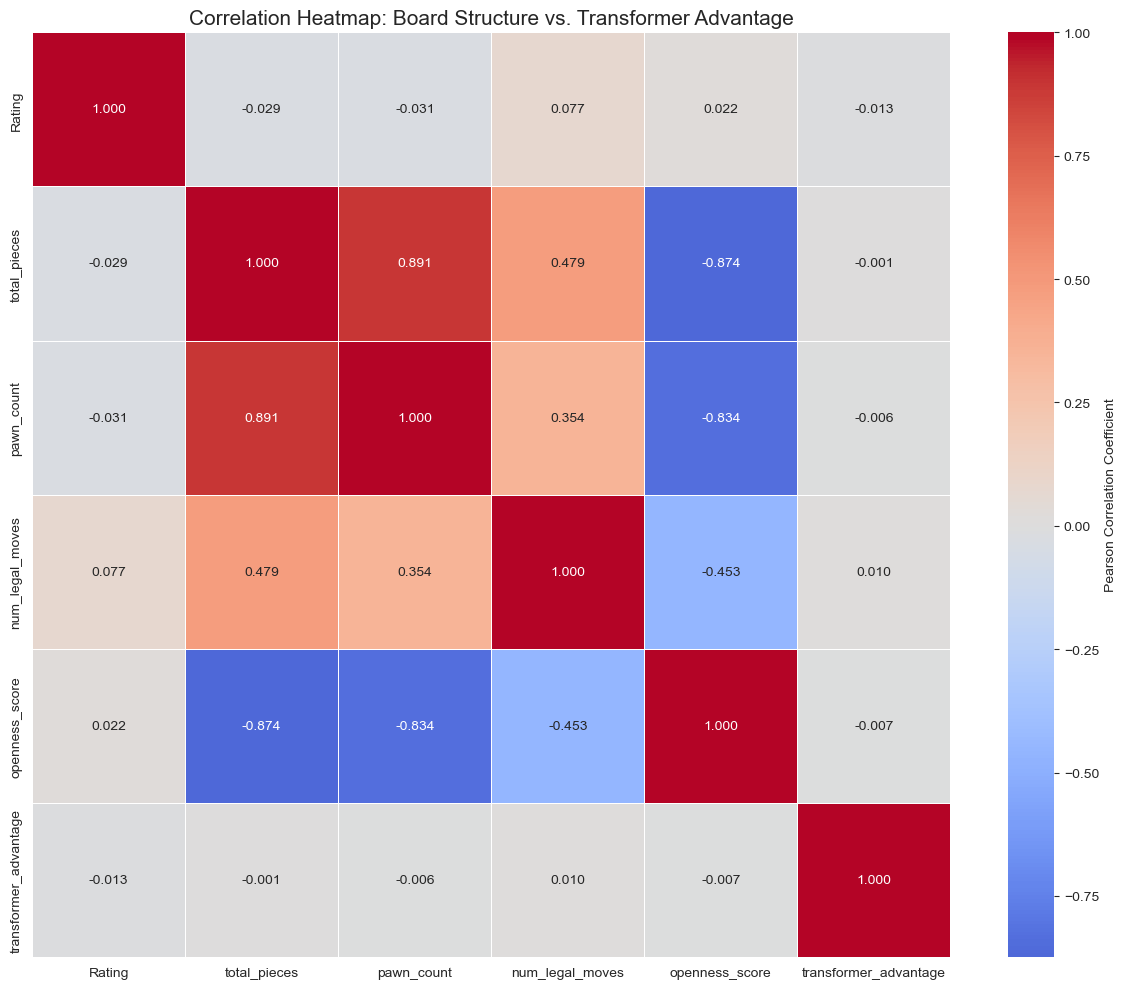

--- Correlation with Transformer Advantage ---
transformer_advantage    1.000000
num_legal_moves          0.009633
total_pieces            -0.000500
pawn_count              -0.005833
openness_score          -0.006599
Rating                  -0.012517
Name: transformer_advantage, dtype: float64


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the Transformer Advantage 
# (1: Trans won alone, -1: CNN won alone, 0: both same)
puzzles_df['transformer_advantage'] = (
    puzzles_df['transformer_first_move_correct'].astype(int) - 
    puzzles_df['cnn_first_move_correct'].astype(int)
)

# 2. Select the structural features for the heatmap
# We include Rating to see how structure relates to difficulty
corr_cols = [
    'Rating', 
    'total_pieces', 
    'pawn_count', 
    'num_legal_moves', 
    'openness_score', 
    'transformer_advantage'
]

# 3. Compute the Correlation Matrix
corr_matrix = puzzles_df[corr_cols].corr()

# 4. Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt=".3f", 
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation Coefficient"}
)

plt.title("Correlation Heatmap: Board Structure vs. Transformer Advantage", fontsize=15)
plt.tight_layout()
plt.savefig("structural_correlation_heatmap.png")
plt.show()

# 5. Display the specific correlation with our target variable
print("--- Correlation with Transformer Advantage ---")
print(corr_matrix['transformer_advantage'].sort_values(ascending=False))

## Section 5: Causal Analysis & Structural Equation Modeling

### Why a DAG?
To truly explain the **"Amplification Paradox"** (+5% accuracy leading to +18% win rate), we cannot rely on correlations alone. We need to map the causal dependencies. A Directed Acyclic Graph (DAG) allows us to visualize how board structure, puzzle difficulty, and model architecture interact.

### The Causal Hypotheses
Based on our Correlation Heatmap, we are modeling the following causal paths:

1.  **Complexity Path:** `Rating` $\rightarrow$ `Puzzle Difficulty` $\rightarrow$ `Model Accuracy`. 
2.  **Structural Path:** `Openness` / `Total Pieces` $\rightarrow$ `Spatial Coordination Requirement`.
3.  **The "Noise" Mediator:** `num_legal_moves` acts as a mediator for complexity.

### The DAG Structure
* **Exogenous Variables:** `Total Pieces`, `Pawn Count`.
* **Mediators:** `Openness`, `Rating`, `num_legal_moves`.
* **Outcome:** `Transformer Advantage` (Correctness Gap).

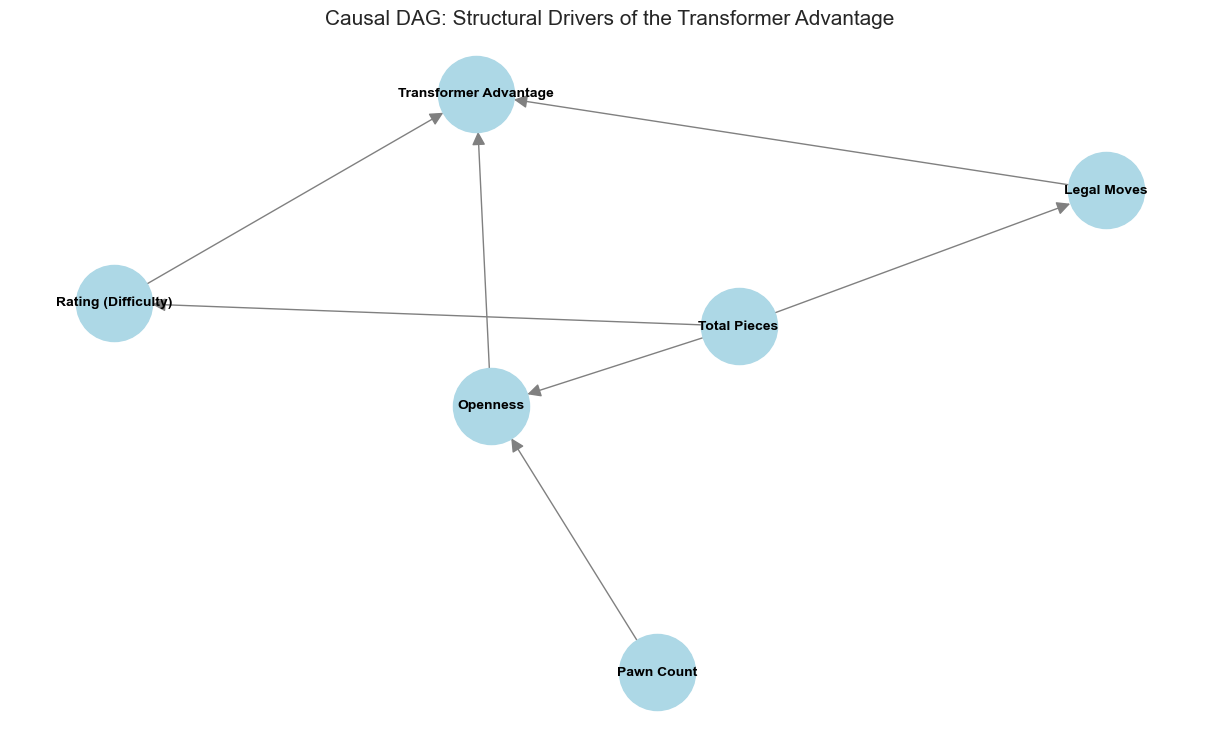

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the DAG structure
dag = nx.DiGraph()

# Add nodes
nodes = [
    "Total Pieces", "Pawn Count", "Openness", 
    "Rating (Difficulty)", "Legal Moves", "Transformer Advantage"
]
dag.add_nodes_from(nodes)

# Add causal edges based on our theory
edges = [
    ("Total Pieces", "Openness"),          # Fewer pieces = higher openness
    ("Pawn Count", "Openness"),           # Fewer pawns = higher openness
    ("Total Pieces", "Rating (Difficulty)"),# Piece count affects how hard the puzzle is
    ("Openness", "Transformer Advantage"),# OPENNESS is the main architectural driver
    ("Rating (Difficulty)", "Transformer Advantage"), # Difficulty affects the gap
    ("Total Pieces", "Legal Moves"),      # More pieces usually = more potential moves
    ("Legal Moves", "Transformer Advantage") # Branching factor complexity
]
dag.add_edges_from(edges)

# Plot the DAG
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(dag, seed=42)
nx.draw(dag, pos, with_labels=True, node_color='lightblue', 
        node_size=3000, font_size=10, font_weight='bold', 
        arrowsize=20, edge_color='gray')

plt.title("Causal DAG: Structural Drivers of the Transformer Advantage", fontsize=15)
plt.show()

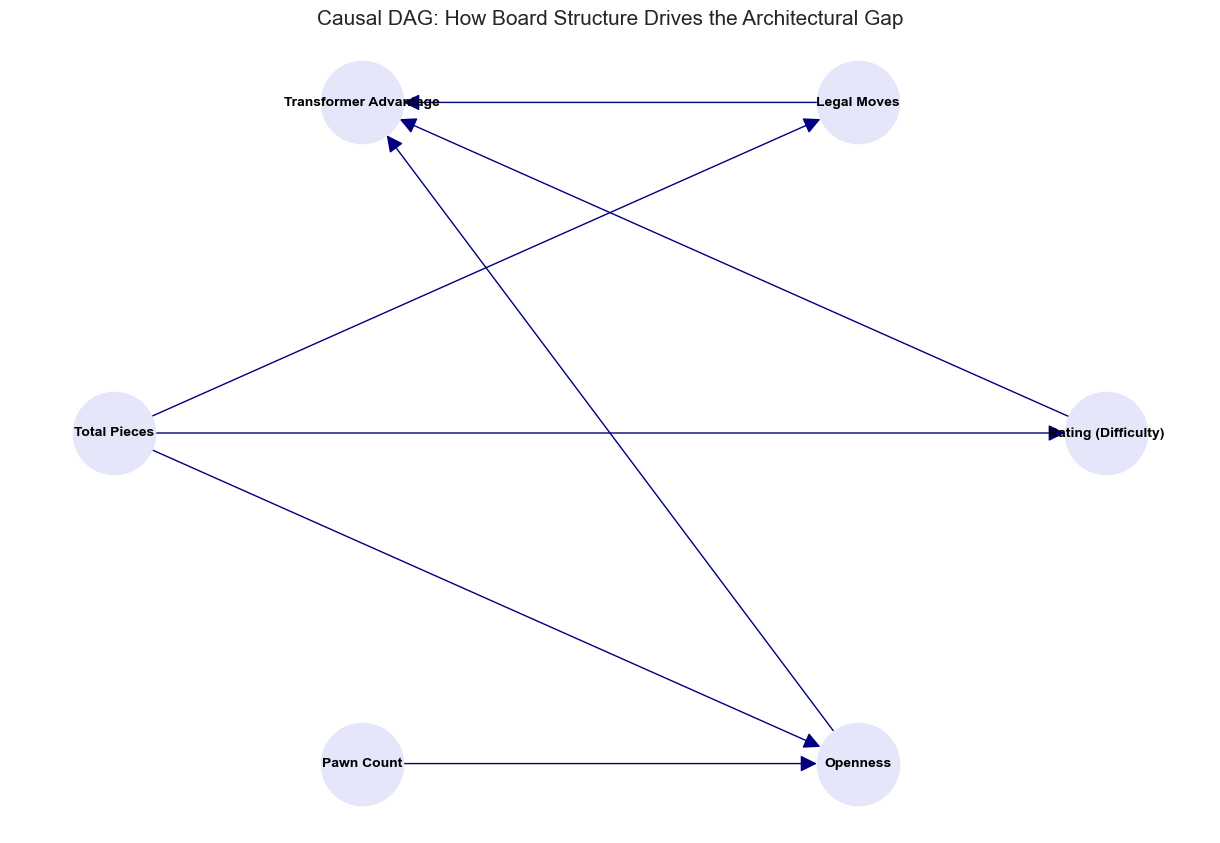

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the DAG structure
dag = nx.DiGraph()

# Add nodes representing our variables
nodes = ["Total Pieces", "Pawn Count", "Openness", "Rating (Difficulty)", "Legal Moves", "Transformer Advantage"]
dag.add_nodes_from(nodes)

# Add causal paths based on our structural logic
edges = [
    ("Total Pieces", "Openness"),          # Fewer pieces -> Higher openness
    ("Pawn Count", "Openness"),           # Pawn structure dictates openness
    ("Total Pieces", "Rating (Difficulty)"),# Material count influences puzzle difficulty
    ("Total Pieces", "Legal Moves"),      # More pieces usually increase the search space
    ("Openness", "Transformer Advantage"), # Theory: Open space favors Attention
    ("Rating (Difficulty)", "Transformer Advantage"), # Theory: CNN closes gap in high-calc puzzles
    ("Legal Moves", "Transformer Advantage")  # Theory: Transformer filters 'noise' better
]
dag.add_edges_from(edges)

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.shell_layout(dag) # Shell layout keeps it organized
nx.draw(dag, pos, with_labels=True, node_color='lavender', node_size=3500, 
        font_size=10, font_weight='bold', arrowsize=25, edge_color='navy')

plt.title("Causal DAG: How Board Structure Drives the Architectural Gap", fontsize=15)
plt.show()

## Section 5.1: Confounder Adjustment - Isolating the Structural Effect

To validate our DAG, we must adjust for **Rating** as a confounder. If we observe a correlation between `openness_score` and `transformer_advantage`, we need to ensure this isn't simply because endgames (high openness) tend to have different difficulty levels than middlegames.

We will use **Stratified Residual Analysis**:
1. We bin the puzzles by `Rating` (Difficulty).
2. We calculate the `Transformer Advantage` within each bin.
3. We observe if the relationship with `openness_score` remains consistent across all difficulty levels.

<Figure size 1200x600 with 0 Axes>

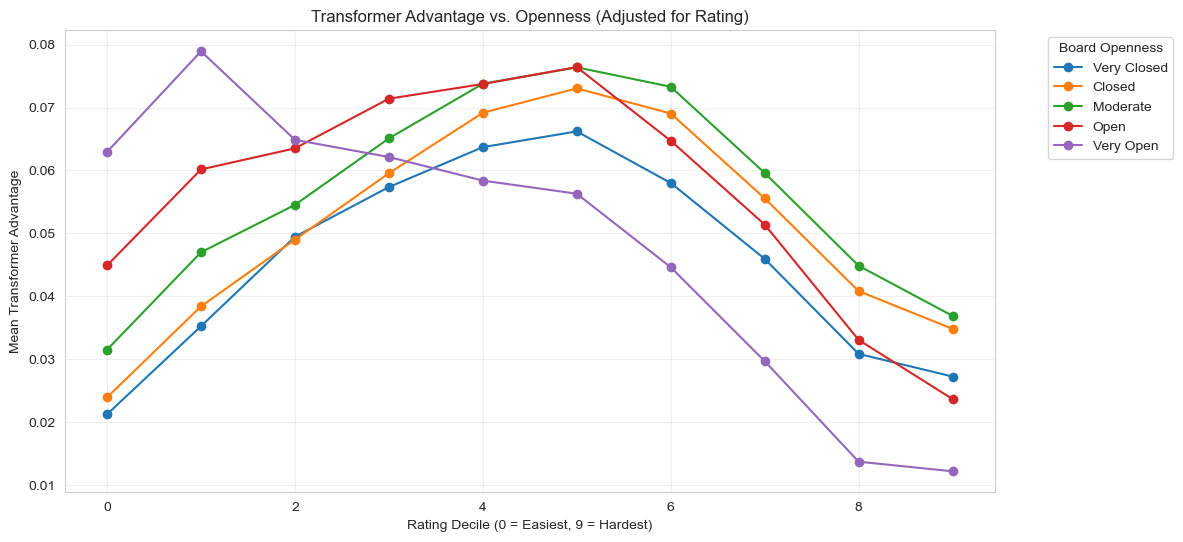

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create Rating Bins (Deciles) to control for difficulty
puzzles_df['rating_bin'] = pd.qcut(puzzles_df['Rating'], 10, labels=False)

# 2. Group by Rating Bin and Openness (binned for visualization)
puzzles_df['openness_bin'] = pd.qcut(puzzles_df['openness_score'], 5, labels=['Very Closed', 'Closed', 'Moderate', 'Open', 'Very Open'])

# 3. Calculate Mean Advantage across these strata
stratified_gap = puzzles_df.groupby(['rating_bin', 'openness_bin'], observed=True)['transformer_advantage'].mean().unstack()

# 4. Plot the results
plt.figure(figsize=(12, 6))
stratified_gap.plot(marker='o', figsize=(12,6))
plt.title("Transformer Advantage vs. Openness (Adjusted for Rating)")
plt.xlabel("Rating Decile (0 = Easiest, 9 = Hardest)")
plt.ylabel("Mean Transformer Advantage")
plt.legend(title="Board Openness", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()